## Term Project
## DSC 630
## Abed Tabbalat

This project is to determine which model has the best accuracy to predict the outcome of diabetes. Please refer to the PDF doc for more details on the project.

In [257]:
# Base libraries
import pandas as pd
import numpy as np
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Warning Skip
import warnings
warnings.filterwarnings("ignore")

In [258]:
# Settings
pd.set_option("display.max_rows", 10, "display.max_columns", 10)
plt.style.use('seaborn')

In [259]:
# Functions for use
## Count plot
def countplot(data, x, w=10, h=7, hue=None, ax=None, order_desc=False):
    plt.figure(figsize=(w, h))
    ax = sns.countplot(data=data, x=x, hue=hue, ax=ax, order= data[x].value_counts().index if order_desc == True else None)
    
    for patch in ax.patches:
        loc = patch.get_x()
        width = patch.get_width()
        height = patch.get_height()
        
        ax.text(loc + width / 2,height + 1, str(height), fontsize=14, color='black', ha='center', weight='bold')

## Scatter Plot        
def scatterplot(data, x, y, hue=None, ax=None):
    ax = sns.scatterplot(data=data, x=x, y=y, hue=hue, ax=ax)
    ax.set_title(f"{x} with {y}", fontsize=15, color="black")    
    if hue:
        ax.legend(prop={"size":25}, frameon=True, shadow=False)

In [260]:
# Read data
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Data Exploration

In [261]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [262]:
# Data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [263]:
# Check for blanks
print('------- Blanks count -------')
df.isnull().sum()

------- Blanks count -------


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [264]:
# Check for duplicates in the data frame
print(f'Total duplicates: {df.duplicated().sum()}')

Total duplicates: 0


**We can determine the following:**

* There are `9` columns and `768` rows in the dataset
* All the variables are numeric
* There are no blanks within the dataset
* There are no duplicates within the dataset

*The min column in the data description table shows `0` in the variables are unexpected, further investigation required.*

**The columns that require investigation are:**

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI



In [265]:
# Investigating variables that show min of 0 that are unexpected
cols = ['Glucose', 'BloodPressure', 'Insulin', 'SkinThickness', 'BMI']

for c in cols:
    u_value = df[df[c] == 0]
    print(f'Count of 0 in {c}: {u_value.shape[0]}')

Count of 0 in Glucose: 5
Count of 0 in BloodPressure: 35
Count of 0 in Insulin: 374
Count of 0 in SkinThickness: 227
Count of 0 in BMI: 11


*Converting `0` to `NaN` will be the option taken to solve this issue*

In [266]:
# 0 -> Nan
df[cols] = df[cols].replace (0, np.nan)

In [267]:
# Total NaN's per variable
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [268]:
# Checking min column in description to see results
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


*Min values in the unexpected columns are now fixed*

*Additional data exploration required by checking the skewness of the data to determine what the NaN values need to be replaced with*

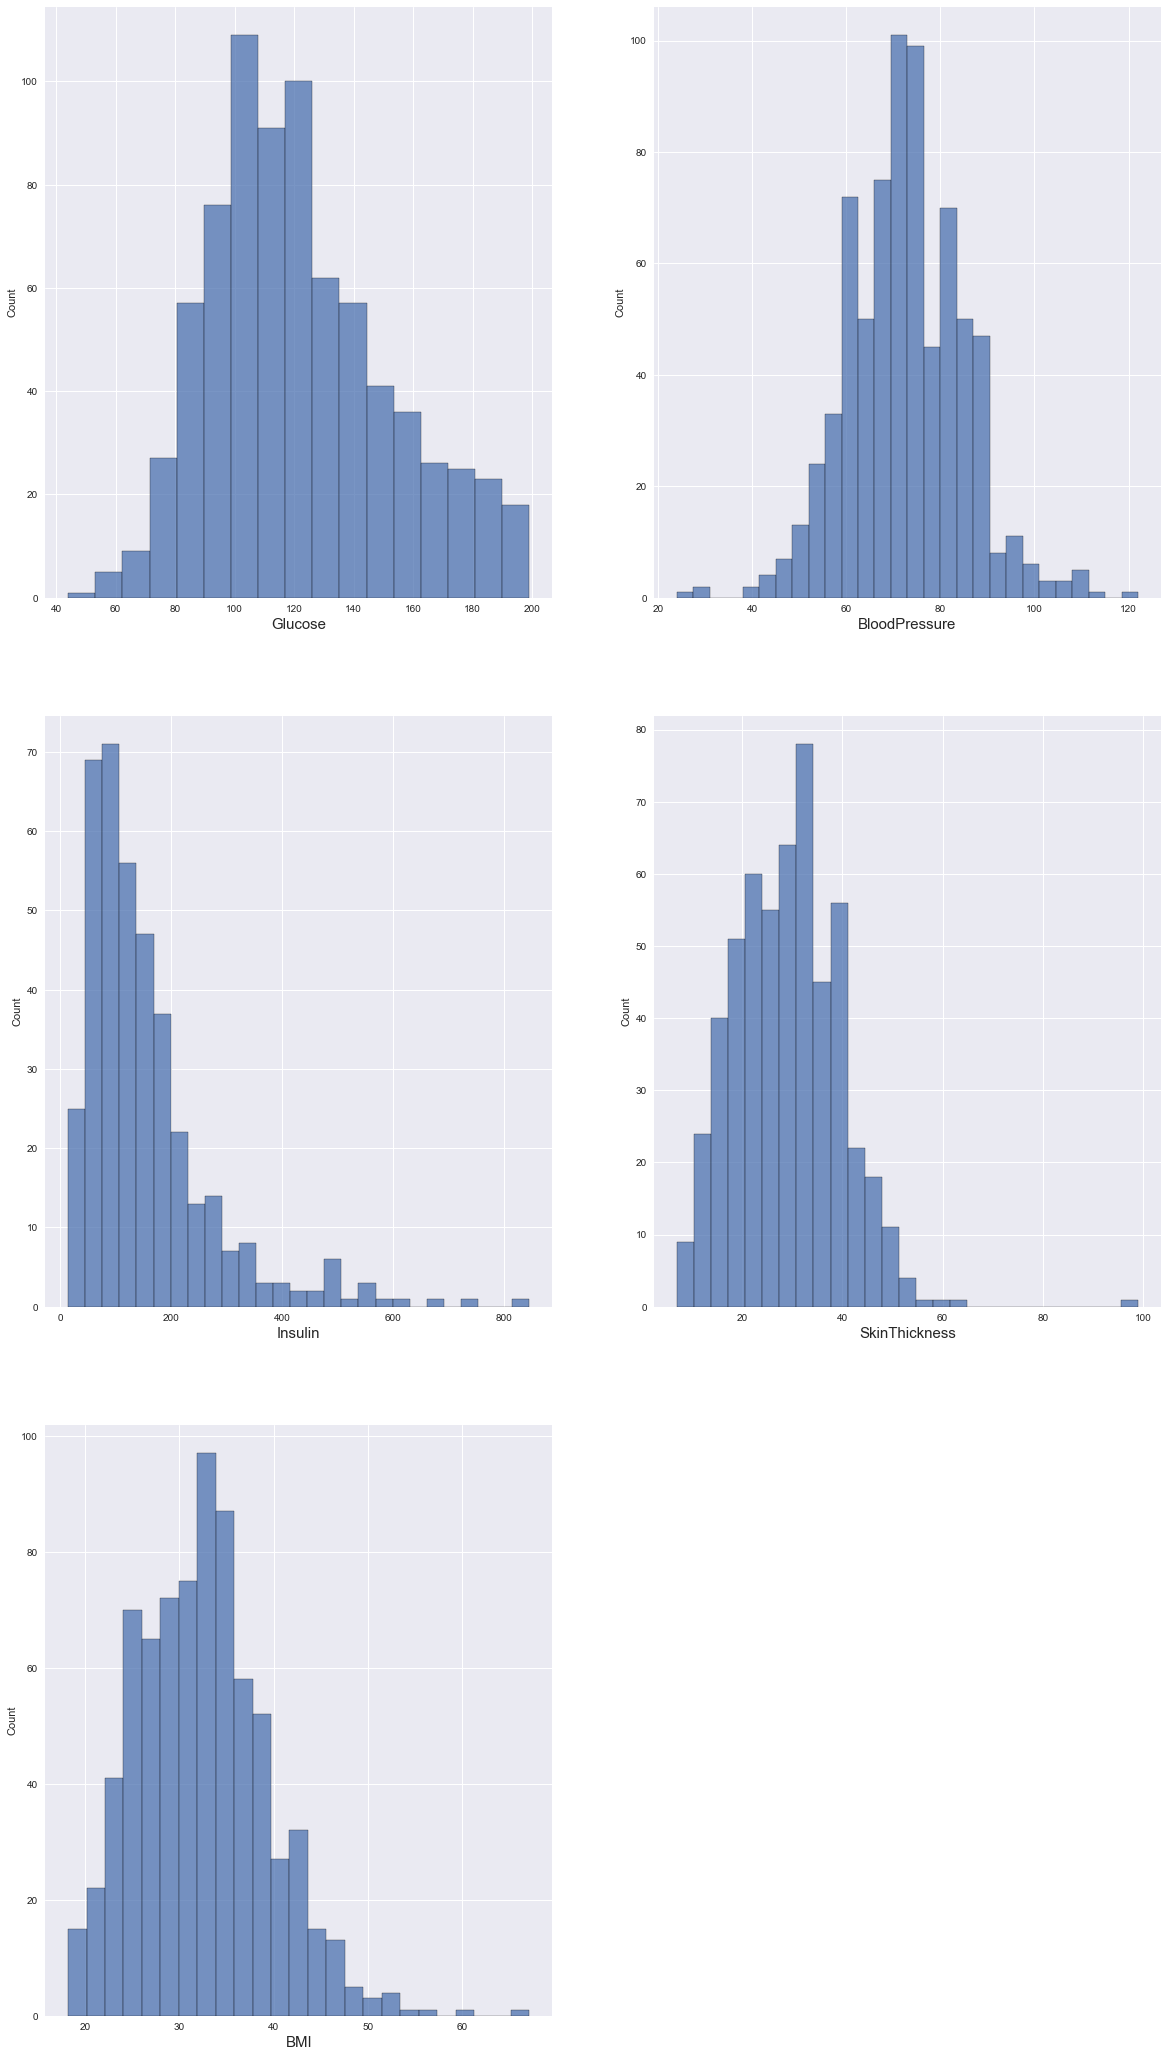

In [269]:
# Histogram to determine the data distribution to replace the NaNs
plt.figure(figsize=(20,50))
for i, c in enumerate(cols):
    plt.subplot(4, 2, i+1)
    sns.histplot(data=df, x=c)
    plt.xlabel(c, fontsize=15)
    plt.xticks(fontsize=10)

*Based on the graphs skewness we can determine if we use mean or median.*

**The decision based on the histograms above are:**

- Glucose **->** Right Skewed **->** Median
- BloodPressure **->** Normal **->** Median
- Insulin **->** Right Skewed **->** Median
- SkinThickness **->** Right Skewed **->** Median
- BMI **->** Right Skewed **->** Median

In [270]:
# Applying replacements for NaN's
for c in cols:
    df[c] = df[c].fillna(df[c].median())
    
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

*Final step of the data cleaning process would be finding out the outliers within all the variables excluding `Outcome` since it is the variable we are trying to predict.*

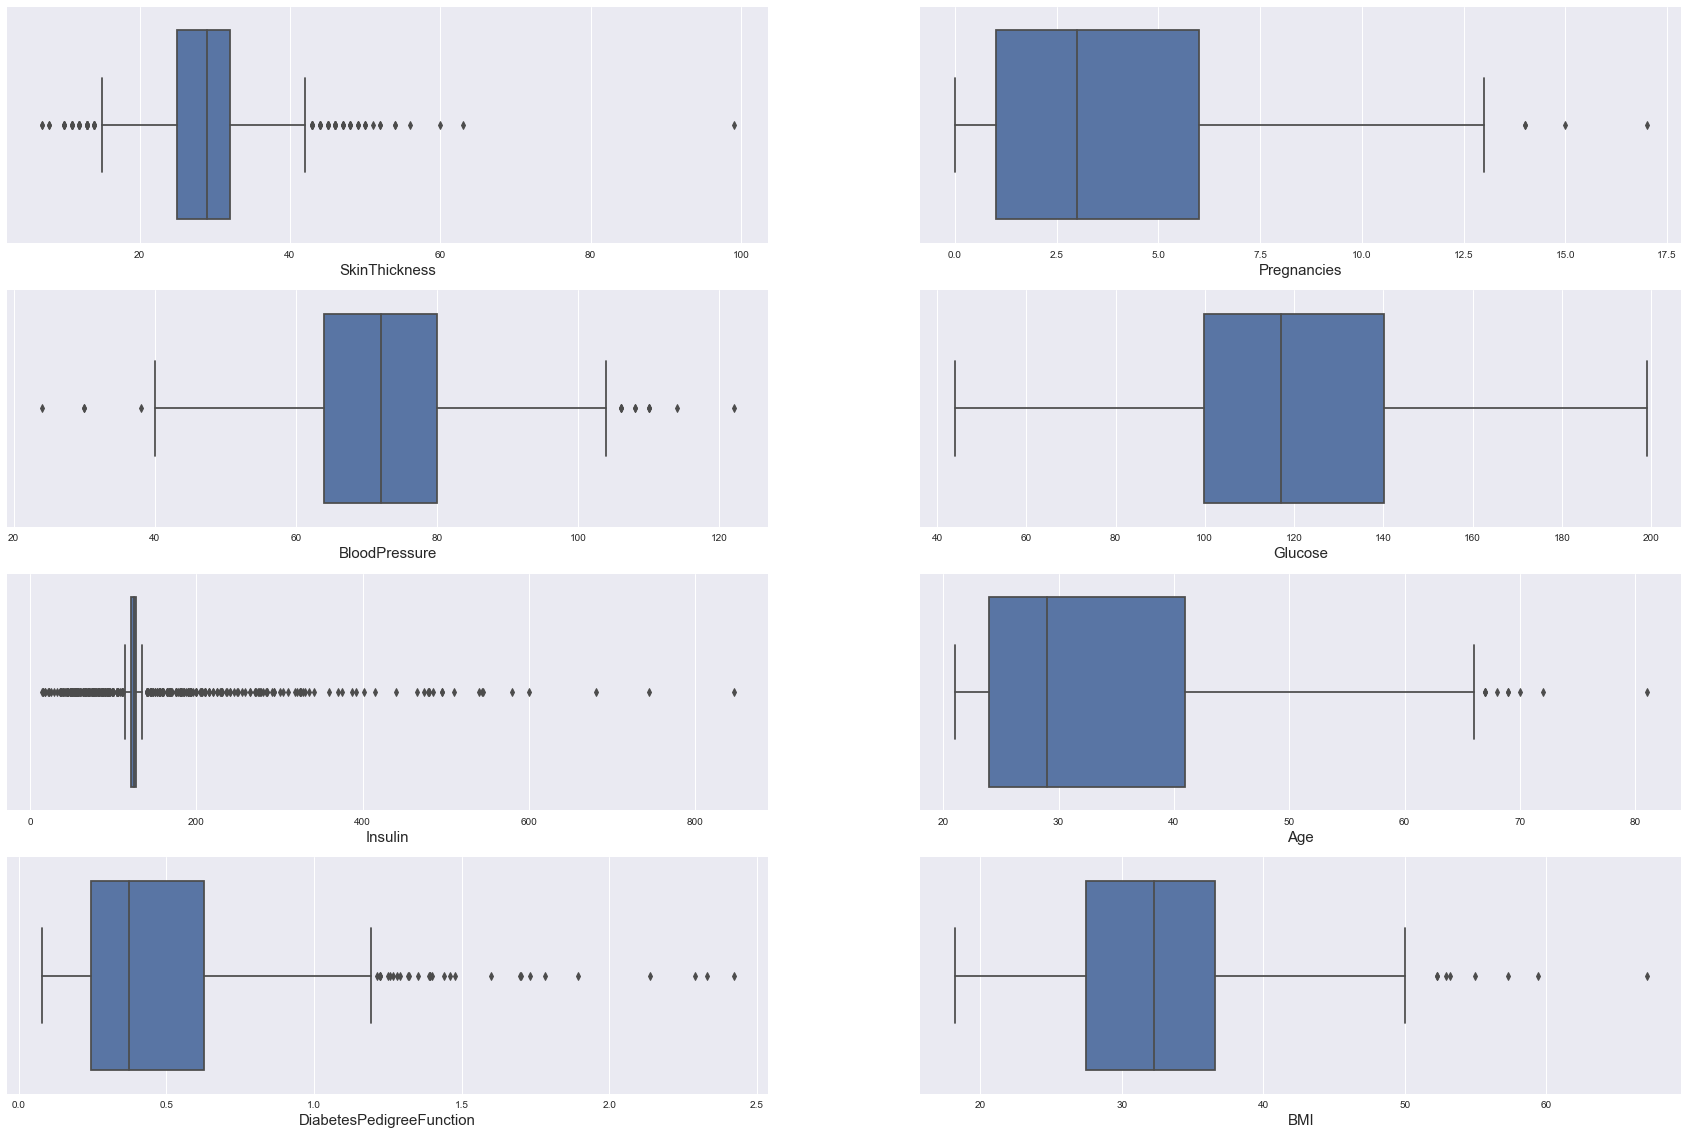

In [271]:
# Boxplot after outlier fix
plt.figure(figsize=(30,20))
for i, c in enumerate(set(df.columns)-{'Outcome'}):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=df, x=c)
    plt.xlabel(c, fontsize=15)
    plt.xticks(fontsize=10)

In [272]:
# Detecting outliers
outliers = [] 
for c in list(set(df.select_dtypes(include=np.number).columns)-{'Outcome'}):
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - (1.5*iqr)
    fence_high = q3 + (1.5*iqr)
    N_O_O = df.loc[(df[c] < fence_low) | (df[c] > fence_high)].shape[0]
                   
    df.loc[(df[c] < fence_low),c] = fence_low
    df.loc[(df[c] > fence_high),c] = fence_high
 
    df[c] = np.where((df[c] > fence_high) | (df[c] > fence_high),df[c].median(),df[c])
    outliers.append([c, N_O_O, df[c].all() < fence_high])

df_outliers = pd.DataFrame(outliers, columns=['Variable', 'No Outliers', 'Handle Status'])
df_outliers

,Variable,No Outliers,Handle Status
0,SkinThickness,87,True
1,Pregnancies,4,True
2,BloodPressure,14,True
3,Glucose,0,True
4,Insulin,346,True
5,Age,9,True
6,DiabetesPedigreeFunction,29,True
7,BMI,8,True


*Now that outliers are handled, we will re-run the boxplot to check*

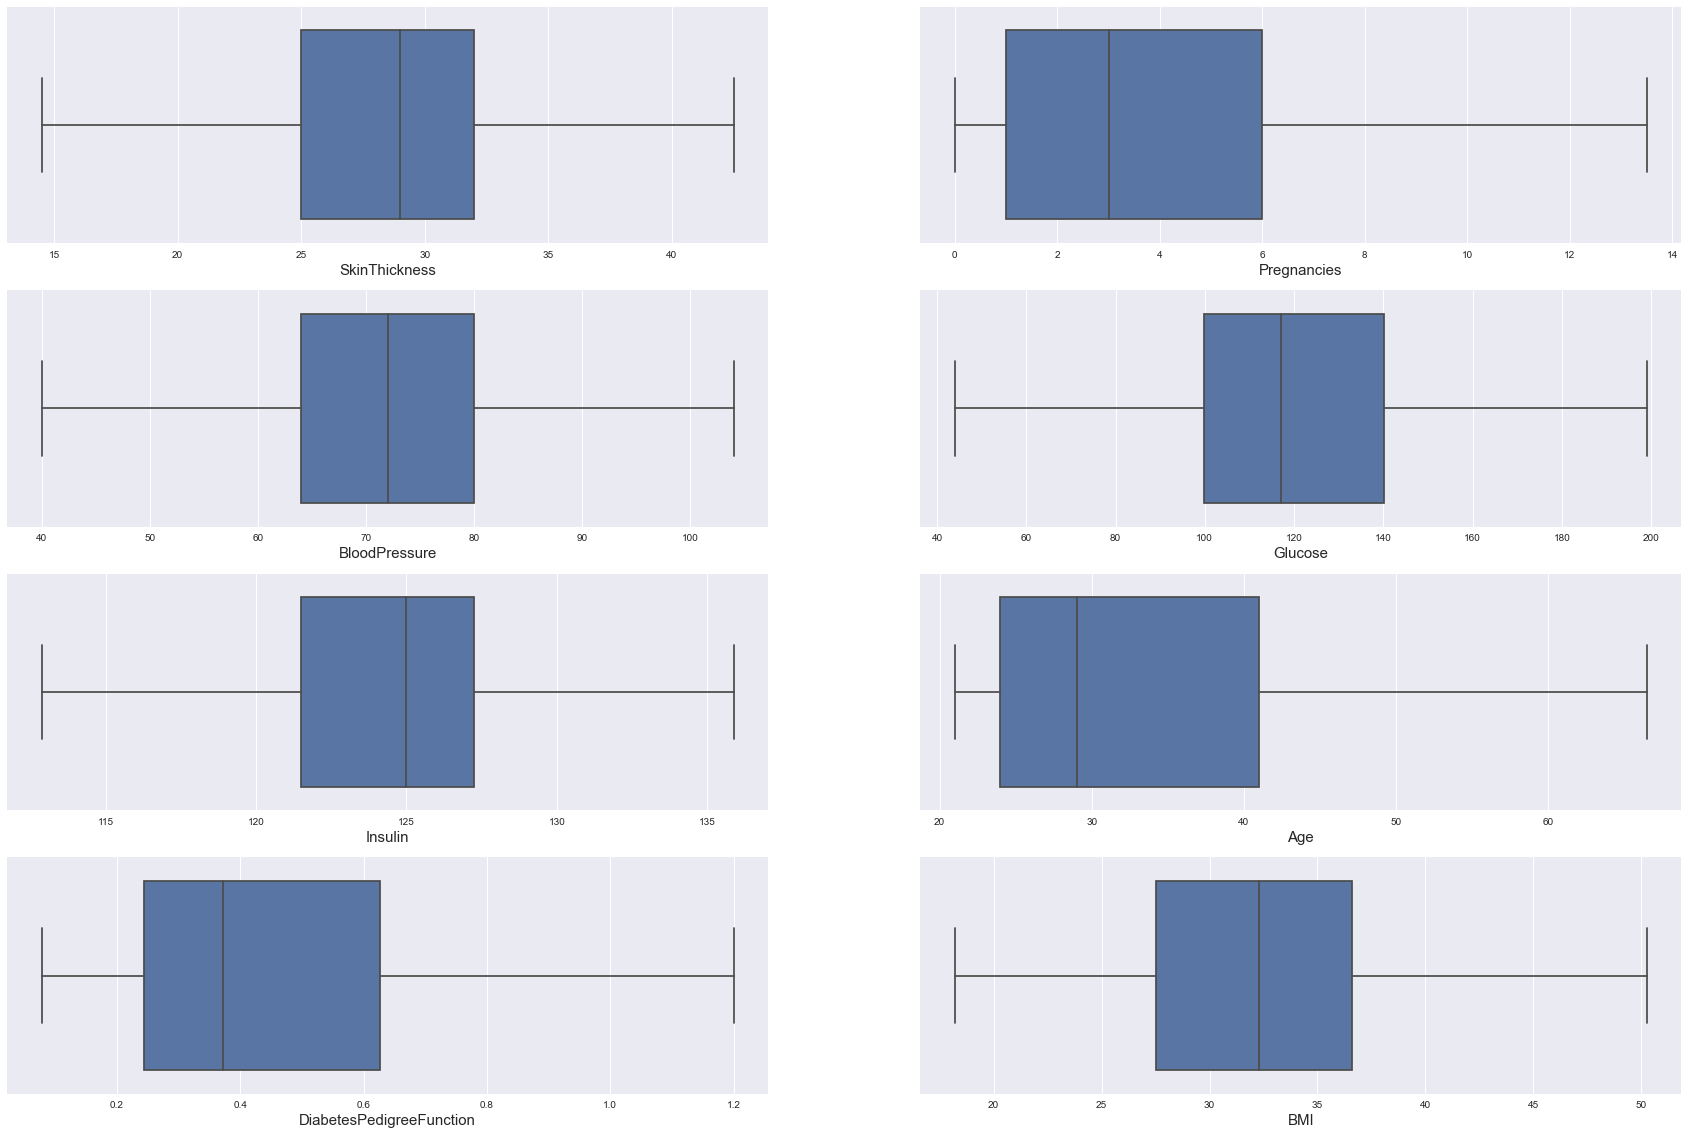

In [273]:
# Box Plot after outliers being taken care of
plt.figure(figsize=(30,20))
for i, c in enumerate(set(df.columns)-{'Outcome'}):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=df, x=c)
    plt.xlabel(c, fontsize=15)
    plt.xticks(fontsize=10)

*Now that outliers are dealt with, we can explore some meaning behind the data.*

*Will start with looking at the target variable and how it is split.*


Postive Outcome Percentage: 34.89583333333333 %
Negative Outcome Percentage: 65.10416666666666 %



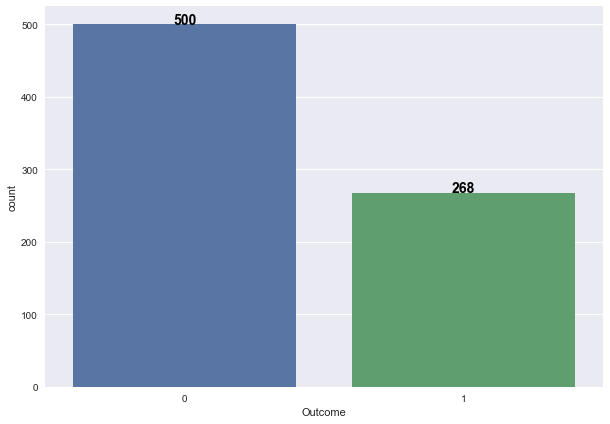

In [274]:
# Countplot to compare people who are positive with diabetes vs negative
countplot(df, 'Outcome')
p_outcome = df['Outcome'][df['Outcome'] == 1].count() / df['Outcome'].count() * 100
n_outcome = df['Outcome'][df['Outcome'] == 0].count() / df['Outcome'].count() * 100

print(f'\nPostive Outcome Percentage: {p_outcome} %')
print(f'Negative Outcome Percentage: {n_outcome} %\n')

*Pregnancy can be good example to perform a count plot since the range would be limited*

posx and posy should be finite values
posx and posy should be finite values



    Pregnancies  Outcome  Outcome_Pct
0           0.0       38    14.179104
1           1.0       29    10.820896
2           2.0       19     7.089552
3           3.0       27    10.074627
4           4.0       23     8.582090
5           5.0       21     7.835821
6           6.0       16     5.970149
7           7.0       25     9.328358
8           8.0       22     8.208955
9           9.0       18     6.716418
10         10.0       10     3.731343
11         11.0        7     2.611940
12         12.0        4     1.492537
13         13.0        5     1.865672
14         13.5        4     1.492537

Total Outcome: 268
Total Outcome_Pct Check: 99.99999999999999



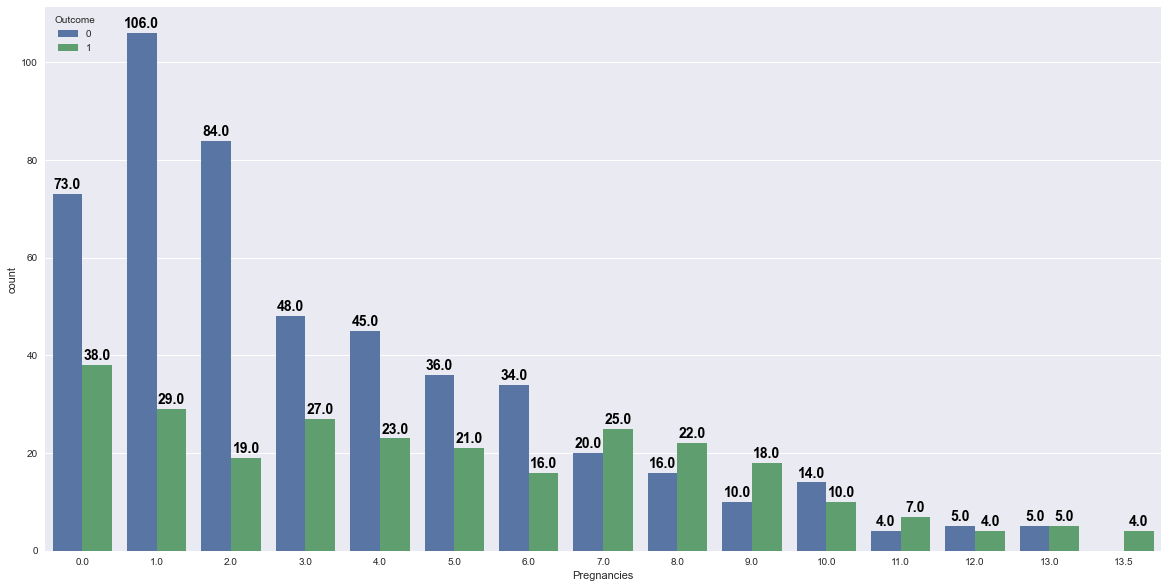

In [275]:
# Creating weighted percentage for positive outcome and plotting the count between Pregnancies and Outcome
countplot(df, 'Pregnancies', 20, 10, hue='Outcome')

pd.set_option("display.max_rows", None, "display.max_columns", None)

p_df = df[['Pregnancies', 'Outcome']]
p_df = p_df[p_df['Outcome'] == 1]
p_df = p_df.groupby('Pregnancies').count().reset_index()
p_df['Outcome_Pct'] = p_df['Outcome'] / p_df['Outcome'].sum() * 100

print(f'\n{p_df}')
print(f'\nTotal Outcome: {p_df["Outcome"].sum()}')
print(f'Total Outcome_Pct Check: {p_df["Outcome_Pct"].sum()}\n')

*We can determine that the highest positive outcomes relative to pregnancies are the ones with `0` pregnancies, which is `14.18%` of the total positive outcome in within the data.*

*Next step would be a correlation matrix between the variables to determine which variables are strongly correlated to `Outcome`.*

<AxesSubplot:>

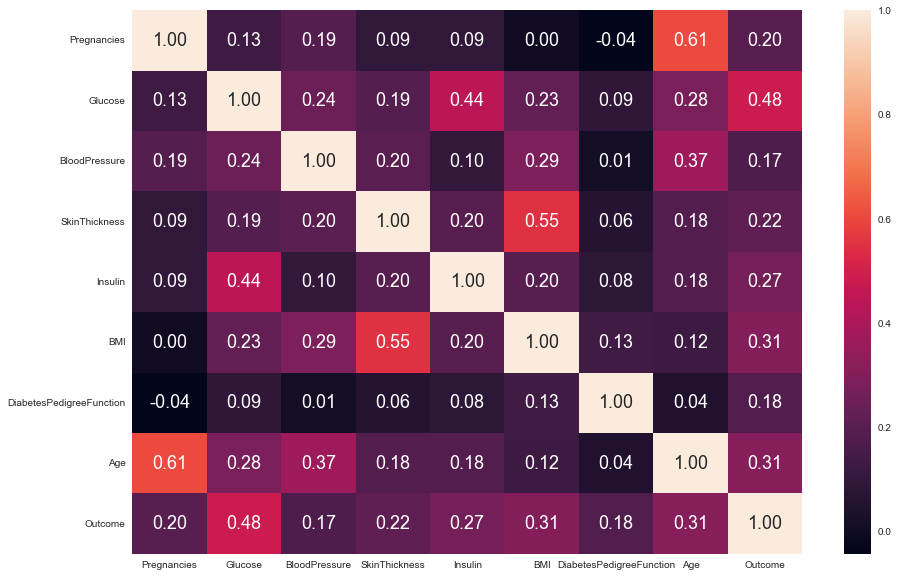

In [276]:
# Correlation Matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.2f', annot_kws={'fontsize' : 18})

**Heatmap shows a high positive correlation between the following:**

- Glucose and Outcome
- Pregnancies and Age
- SkinThickness and BMI

*Now that we know which variables are highly correlated, a scatter plot showing the details would be beneficial.*

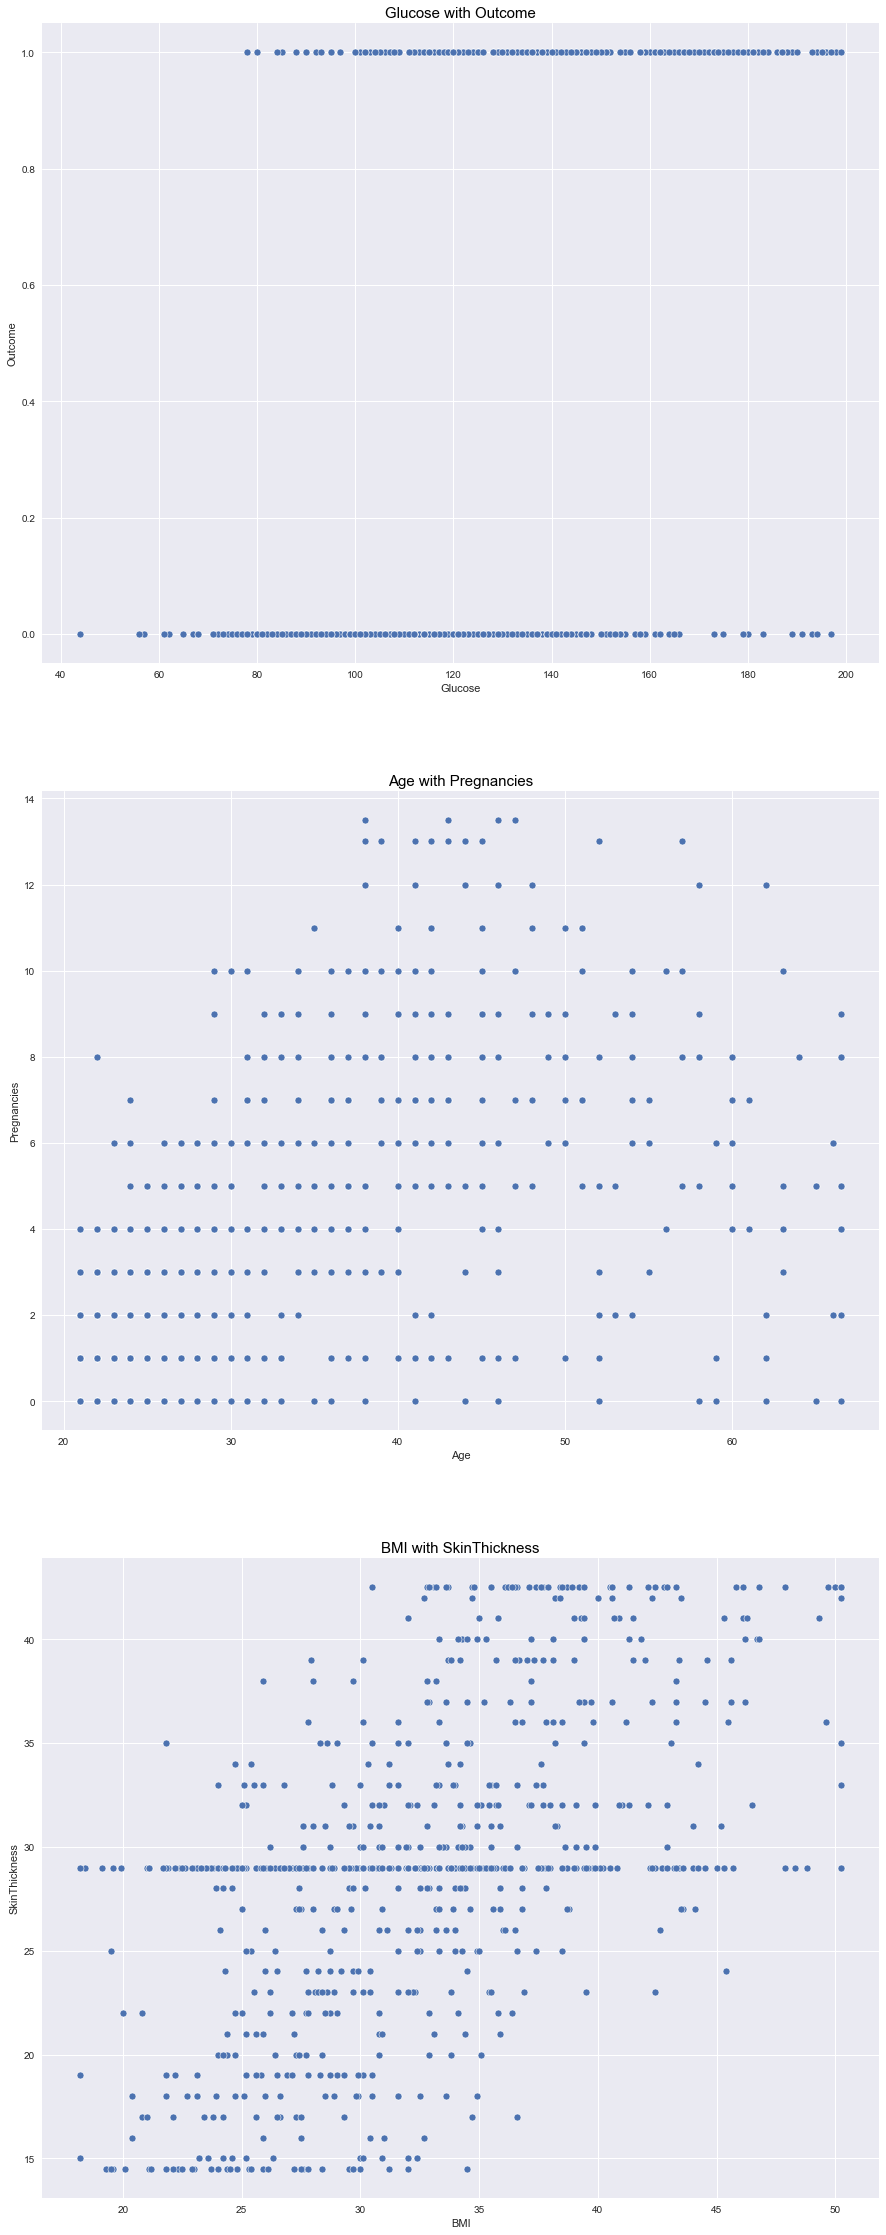

In [277]:
plt.figure(figsize=(15,40))
# Glucose and Outcome plot
plt.subplot(3, 1, 1)
scatterplot(df, x='Glucose', y='Outcome')

# Pregnancies and Age
plt.subplot(3, 1, 2)
scatterplot(df, x='Age', y='Pregnancies')

# SkinThickness and BMI
plt.subplot(3, 1, 3)
scatterplot(df, x='BMI', y='SkinThickness')

*The scatter plots clearly shows how if one variable increases the other would increase as well, and vise versa.*

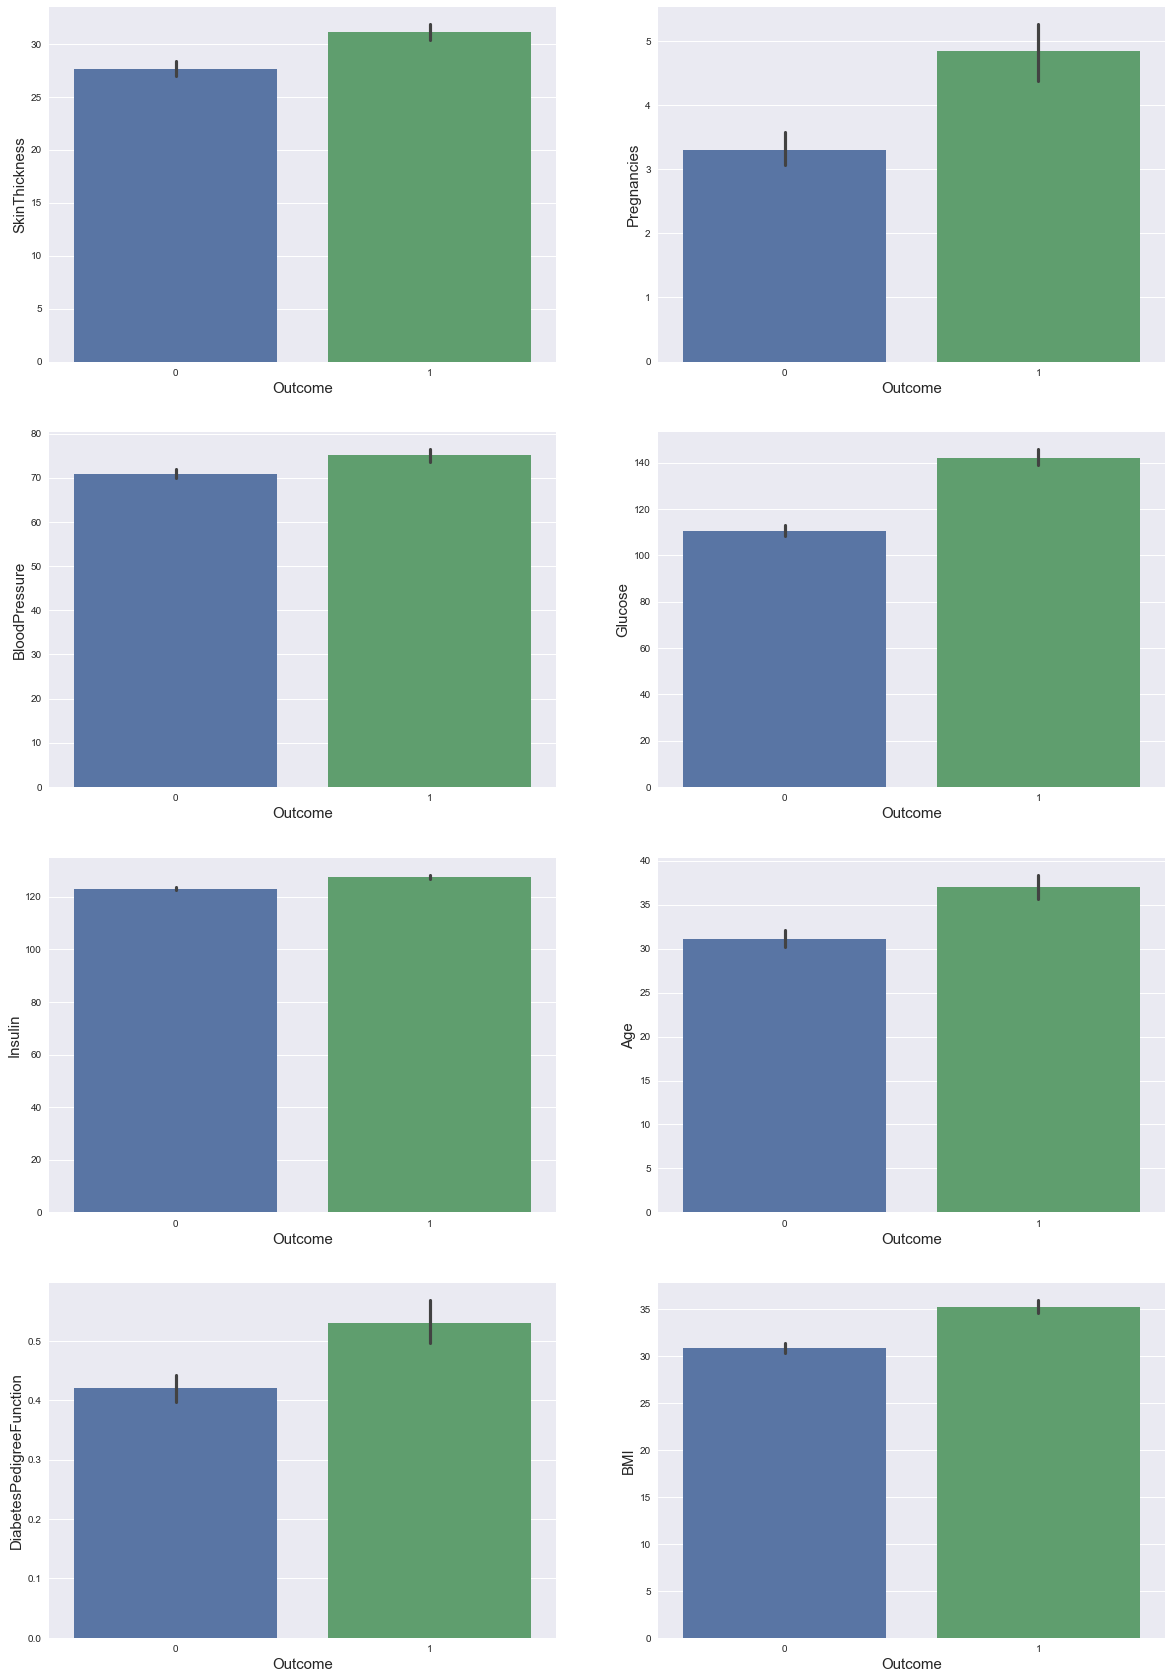

In [278]:
# Creating barcharts for all the variables against outcome to prove the relationship
plt.figure(figsize=(20,30))
for i, c in enumerate(set(df.columns)-{'Outcome'}):
    plt.subplot(4,2,i+1)
    sns.barplot(data=df, x='Outcome', y=c, )
    plt.xlabel('Outcome', fontsize=15)
    plt.xticks(fontsize=10)
    plt.ylabel(c, fontsize=15)
    plt.yticks(fontsize=10)

*The barcharts above suggest that people who are diabetic have higher values in all the variables. Meaning the higher the readings the more likely a person is diabetic.*

### Modeling (All Data)

In [279]:
pd.set_option("display.max_rows", 10, "display.max_columns", 10)
# Data overview
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,42.5,135.875,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,125.000,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.875,26.2,0.245,30.0,0
766,1.0,126.0,60.0,29.0,125.000,30.1,0.349,47.0,1


In [280]:
# Splitting Outcome (target variable) out of the dataframe
X = df.drop(columns=['Outcome'])
y = df['Outcome']

print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0  125.000  33.6   
1            1.0     85.0           66.0           29.0  125.000  26.6   
2            8.0    183.0           64.0           29.0  125.000  23.3   
3            1.0     89.0           66.0           23.0  112.875  28.1   
4            0.0    137.0           40.0           35.0  135.875  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           42.5  135.875  32.9   
764          2.0    122.0           70.0           27.0  125.000  36.8   
765          5.0    121.0           72.0           23.0  112.875  26.2   
766          1.0    126.0           60.0           29.0  125.000  30.1   
767          1.0     93.0           70.0           31.0  125.000  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1                       0.351  31.0

In [281]:
#Splitting the data into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=60)

print(f'\n----- Shape of the splits -----')
print(f'X_train: {X_train.shape[0]} rows and {X_train.shape[1]} columns')
print(f'X_test: {X_test.shape[0]} rows and {X_test.shape[1]} columns\n')


----- Shape of the splits -----
X_train: 614 rows and 8 columns
X_test: 154 rows and 8 columns



#### Linear Regression (All Data)

In [282]:
# Fitting and predicting using Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
lr_test = lr.predict(X_test)


Accuracy: 76.62%



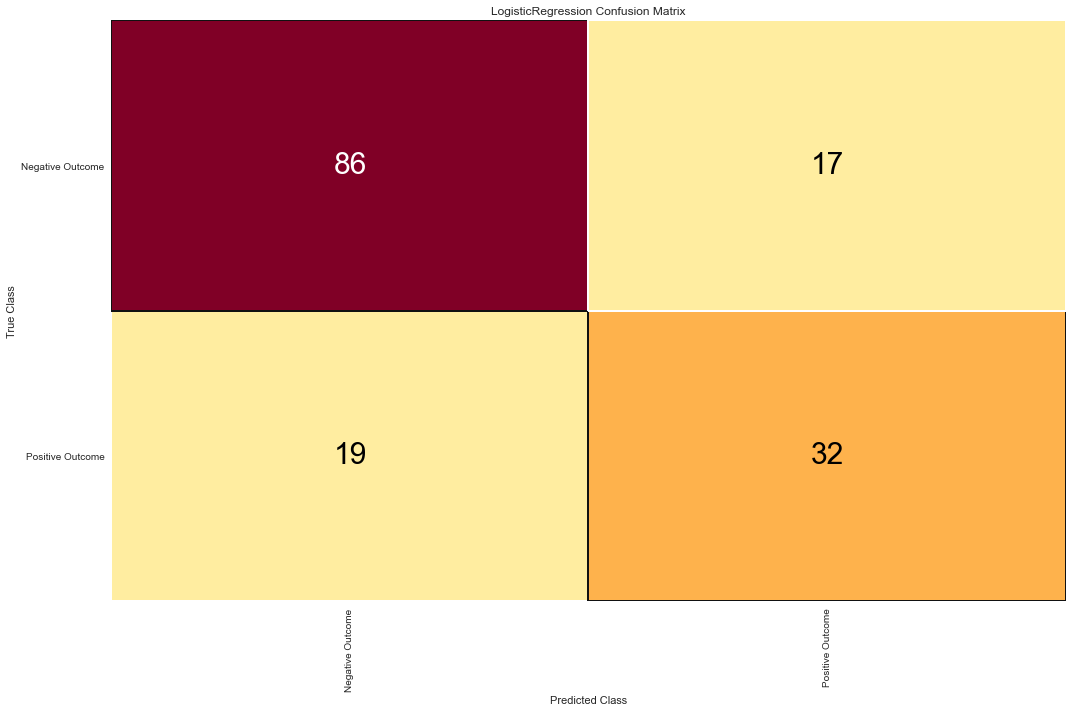

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [283]:
plt.figure(figsize=(15,10))

# Computing results of Linear Regression
cm_lr = ConfusionMatrix(lr, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
cm_lr.fit(X_test, y_test)

# Computing accuracy of the model
lr_accuracy = round(cm_lr.score(X_test, y_test) * 100, 2)
print(f'\nAccuracy: {lr_accuracy}%\n')

# Confusion matrix vizualization
for l in cm_lr.ax.texts:
    l.set_size(30)
cm_lr.show()

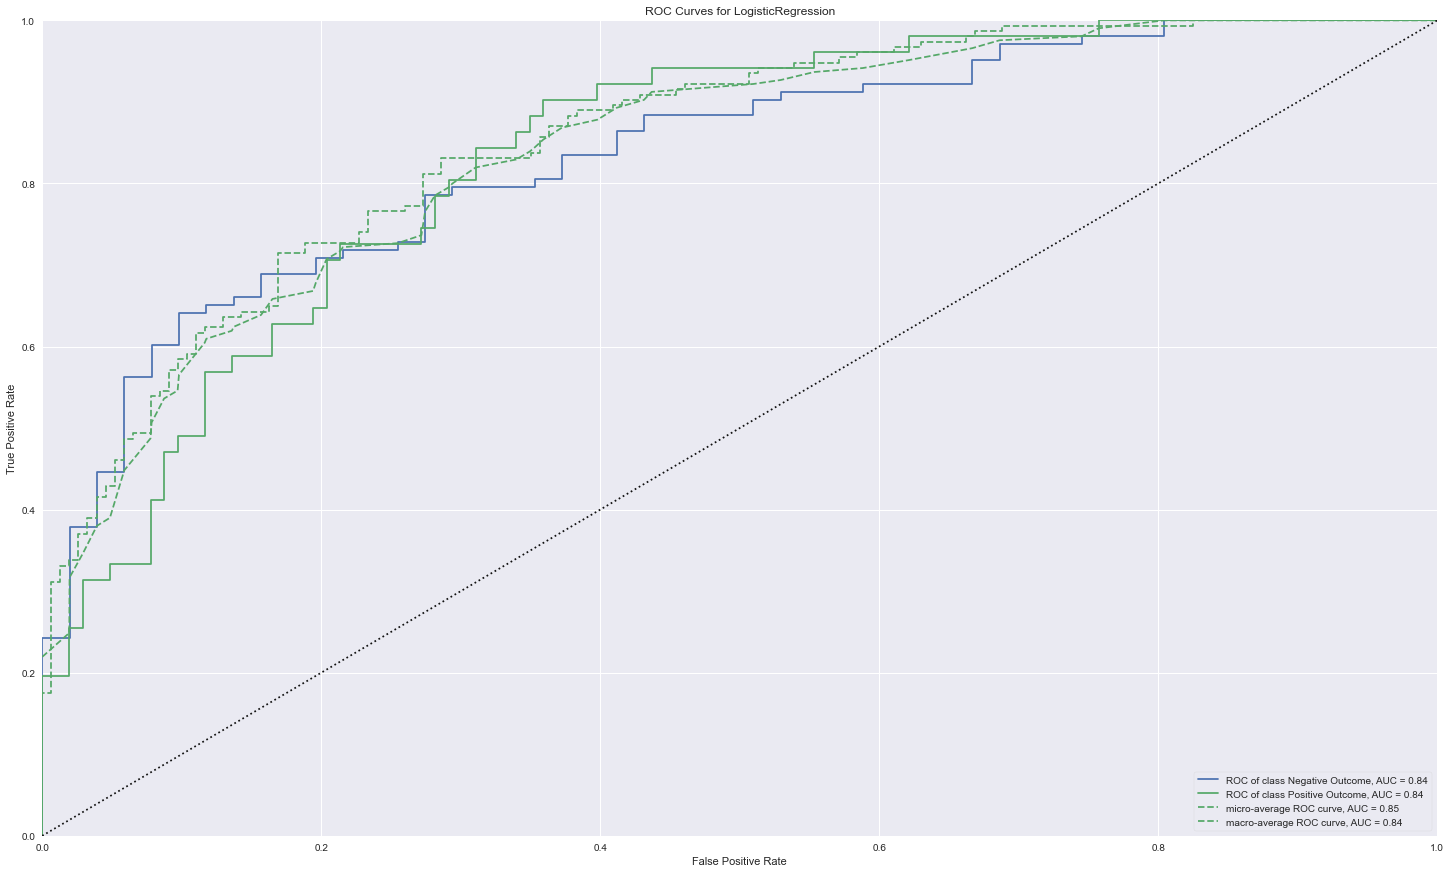

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [284]:
plt.figure(figsize=(25,15))
# ROC curve and AUC score
lr_roc = ROCAUC(lr, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
lr_roc.fit(X_test, y_test)

lr_roc.score(X_test, y_test)
lr_roc.show()

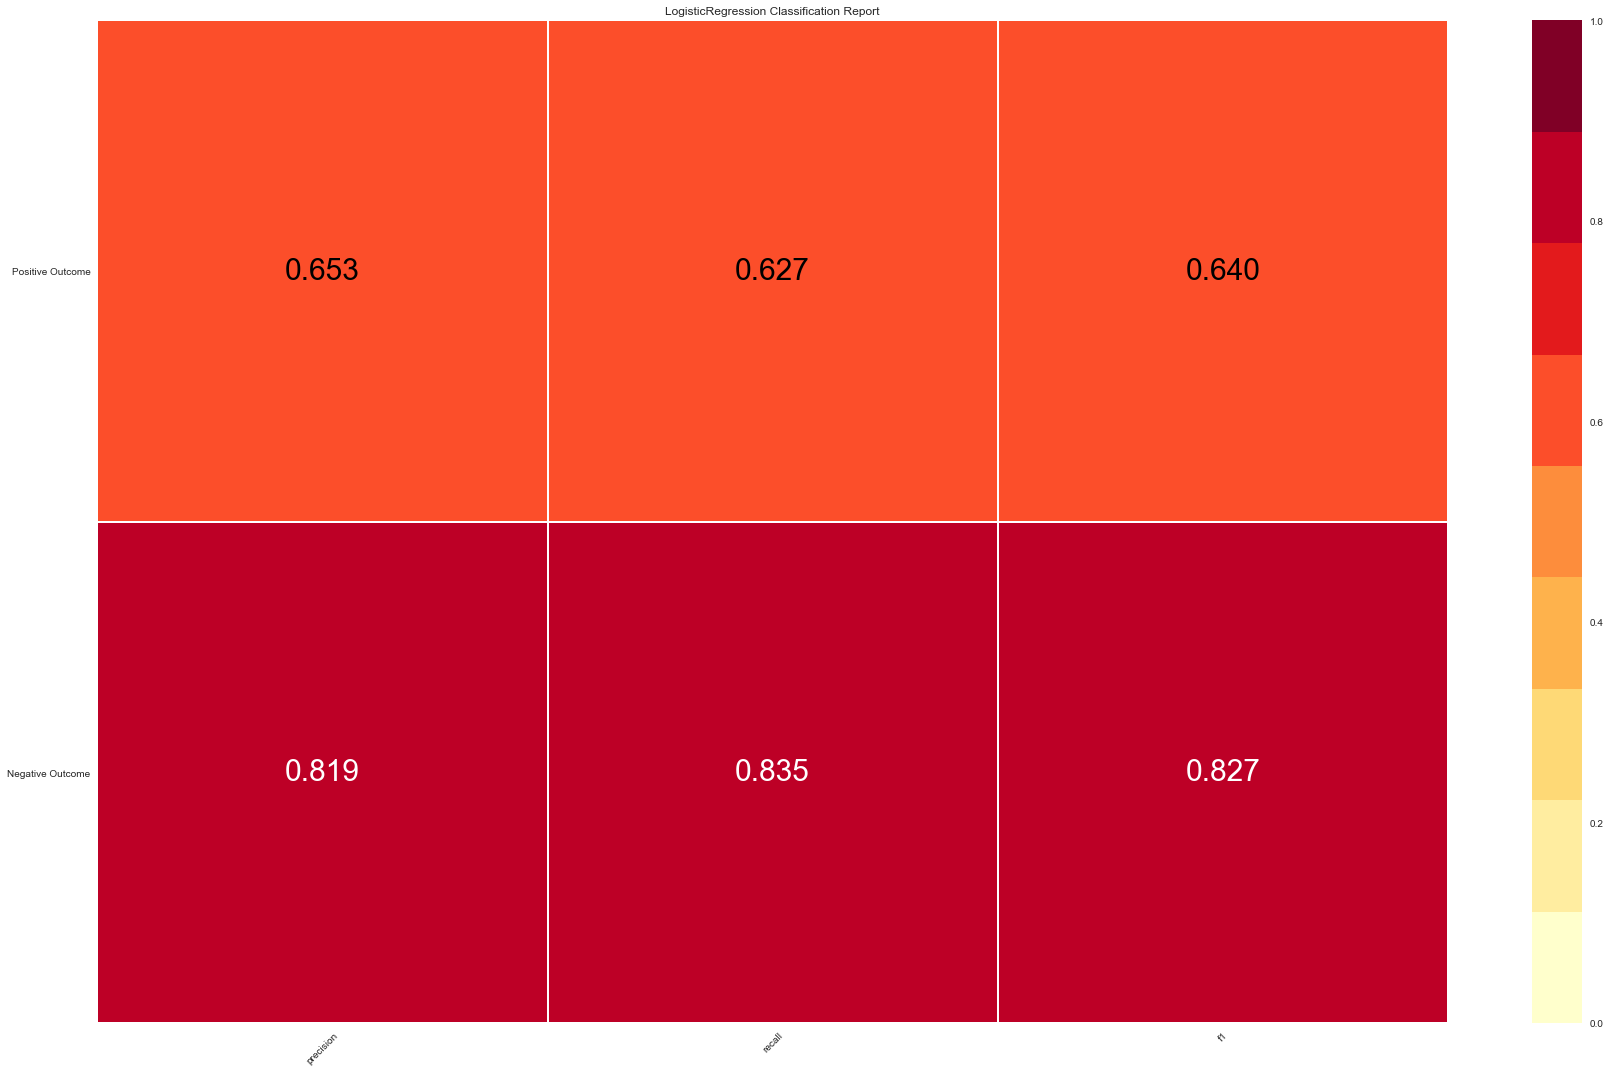

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [285]:
plt.figure(figsize=(25,15))
# Classification Report
lr_cr = ClassificationReport(lr, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
lr_cr.fit(X_train, y_test)
lr_cr.score(X_test, y_test)

# Confusion matrix vizualization
for l in lr_cr.ax.texts:
    l.set_size(30)
lr_cr.show()

The model shows an accuracy of `76.62%` which is fairly reasonable given the shape of the data. F1 scores are:

* `0.64` for Positive outcome
* `0.827` of Negative outcome

In [286]:
# Creating an environment to compare model results
og_score = []
og_score.append({
    'Model' : 'Logistic_Regression_OG',
    'Accuracy' : lr_accuracy,
    'F1_Positive' : 0.64,
    'F1_Negative' : 0.827,
    'AUC' : 0.84
})

#### Random Forest (All Data)

In [287]:
# Fitting and predicting using Random Forest
rf = RandomForestClassifier(n_estimators=500, random_state=60)
rf.fit(X_train, y_train)
rf_test = rf.predict(X_test)


Accuracy: 78.57%



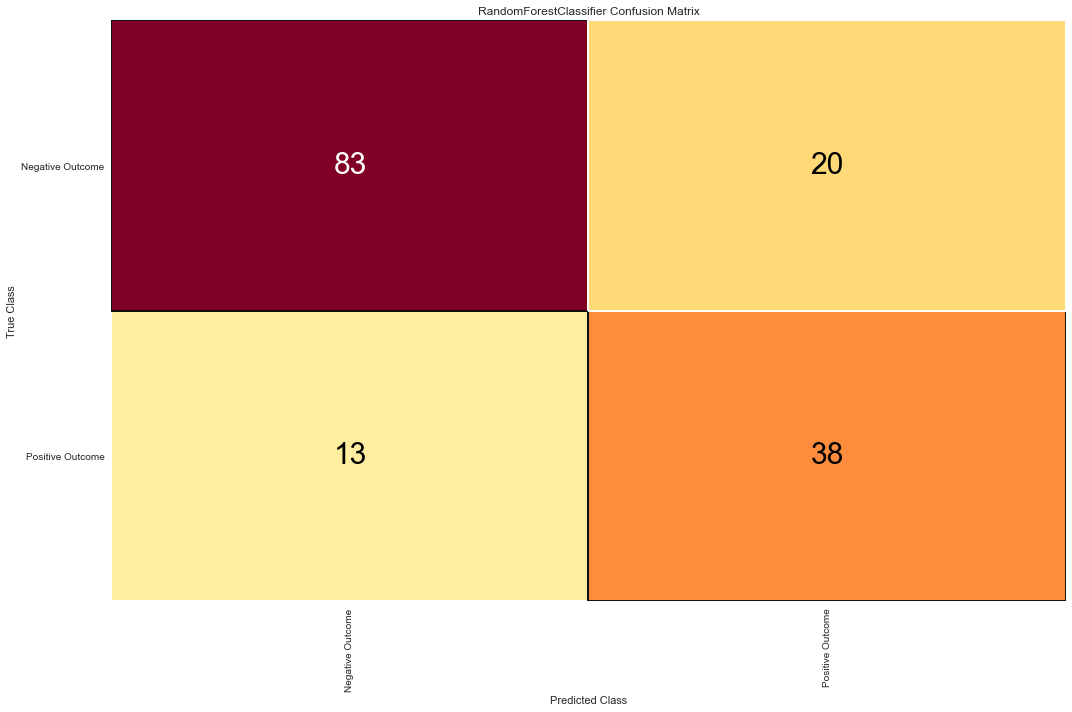

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [288]:
plt.figure(figsize=(15,10))

# Computing results of Random Forest
cm_rf = ConfusionMatrix(rf, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
cm_rf.fit(X_test, y_test)

# Computing accuracy of the model
rf_accuracy = round(cm_rf.score(X_test, y_test) * 100, 2)
print(f'\nAccuracy: {rf_accuracy}%\n')

# Confusion matrix vizualization
for l in cm_rf.ax.texts:
    l.set_size(30)
cm_rf.show()

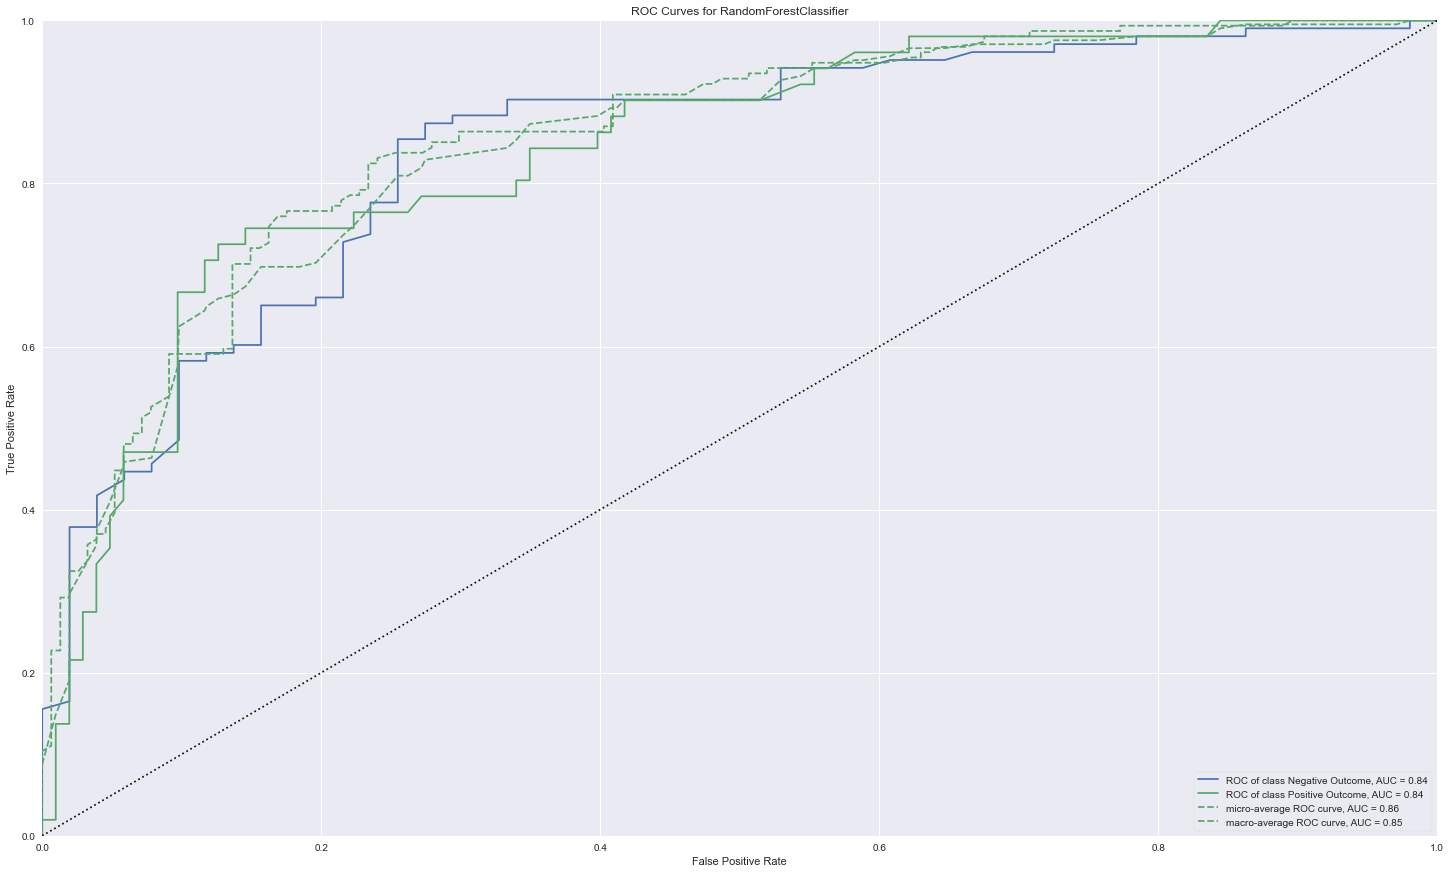

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [289]:
plt.figure(figsize=(25,15))
# ROC curve and AUC score
rf_roc = ROCAUC(rf, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
rf_roc.fit(X_test, y_test)

rf_roc.score(X_test, y_test)
rf_roc.show()

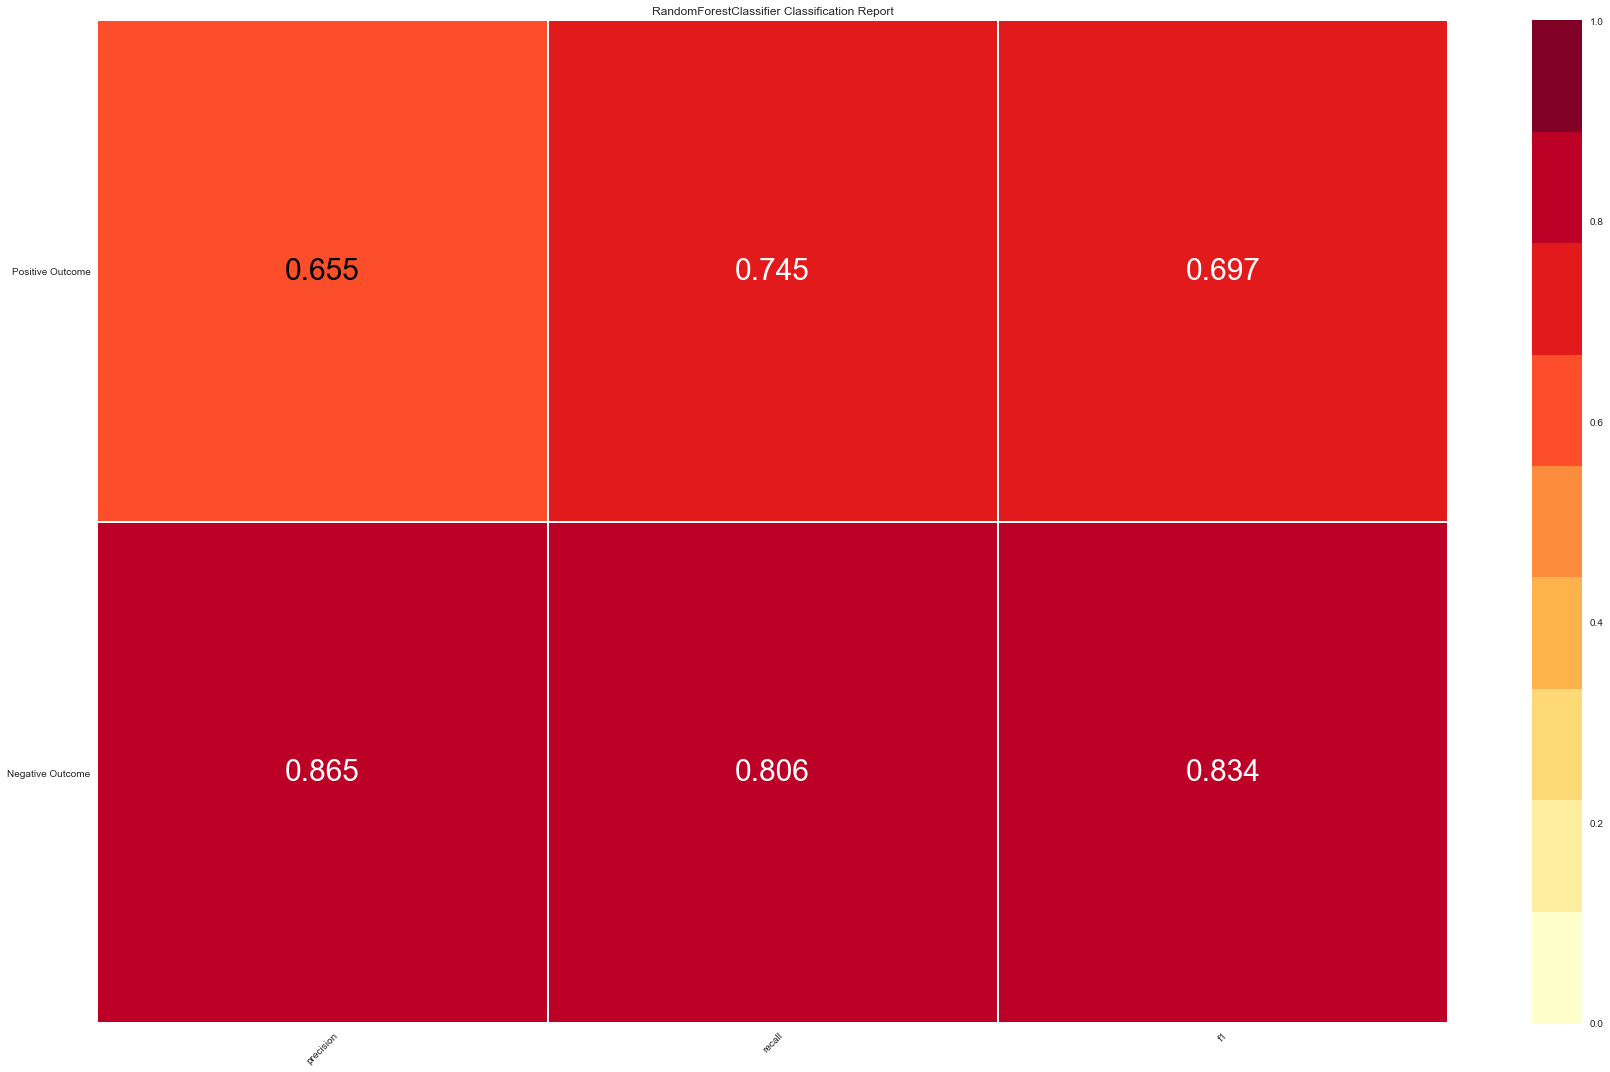

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [290]:
plt.figure(figsize=(25,15))
# Classification Report
rf_cr = ClassificationReport(rf, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
rf_cr.fit(X_train, y_test)
rf_cr.score(X_test, y_test)

# Confusion matrix vizualization
for l in rf_cr.ax.texts:
    l.set_size(30)
rf_cr.show()

Accuracy results show better outcome than Logistic Regression, this is outside my expectation (results are close). Random Forest resulted with `78.57%` accuracy. F1 scores are:

* `0.697` for Positive outcome
* `0.834` of Negative outcome

In [291]:
# Adding results to compare
og_score.append({
    'Model' : 'Random_Forest_OG',
    'Accuracy' : rf_accuracy,
    'F1_Positive' : 0.697,
    'F1_Negative' : 0.834,
    'AUC' : 0.84
})

#### Decision Tree (All Data)

In [292]:
# Fitting and predicting using Decision Tree
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
dt_test = dt.predict(X_test)


Accuracy: 69.48%



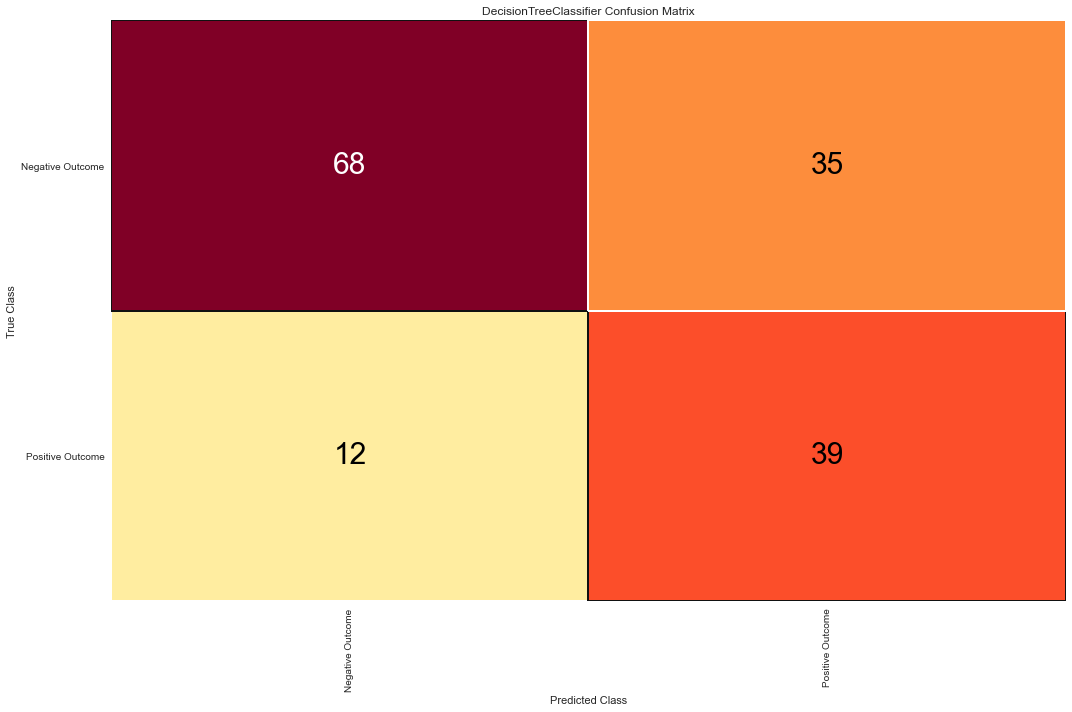

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [293]:
plt.figure(figsize=(15,10))

# Computing results of Random Forest
cm_dt = ConfusionMatrix(dt, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
cm_dt.fit(X_test, y_test)

# Computing accuracy of the model
dt_accuracy = round(cm_dt.score(X_test, y_test) * 100, 2)
print(f'\nAccuracy: {dt_accuracy}%\n')

# Confusion matrix vizualization
for l in cm_dt.ax.texts:
    l.set_size(30)
cm_dt.show()

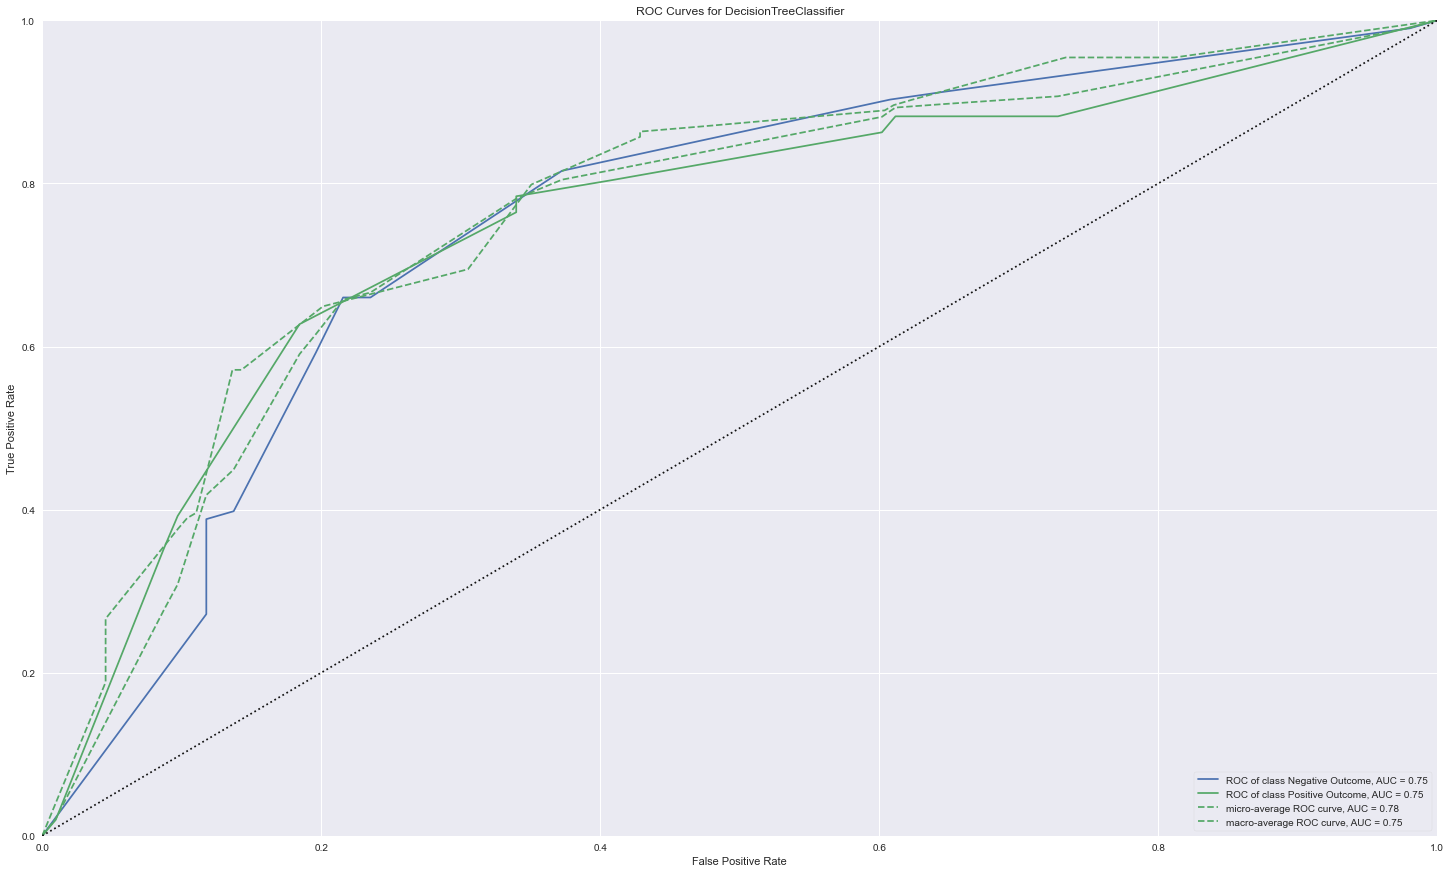

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [294]:
plt.figure(figsize=(25,15))
# ROC curve and AUC score
dt_roc = ROCAUC(dt, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
dt_roc.fit(X_test, y_test)

dt_roc.score(X_test, y_test)
dt_roc.show()

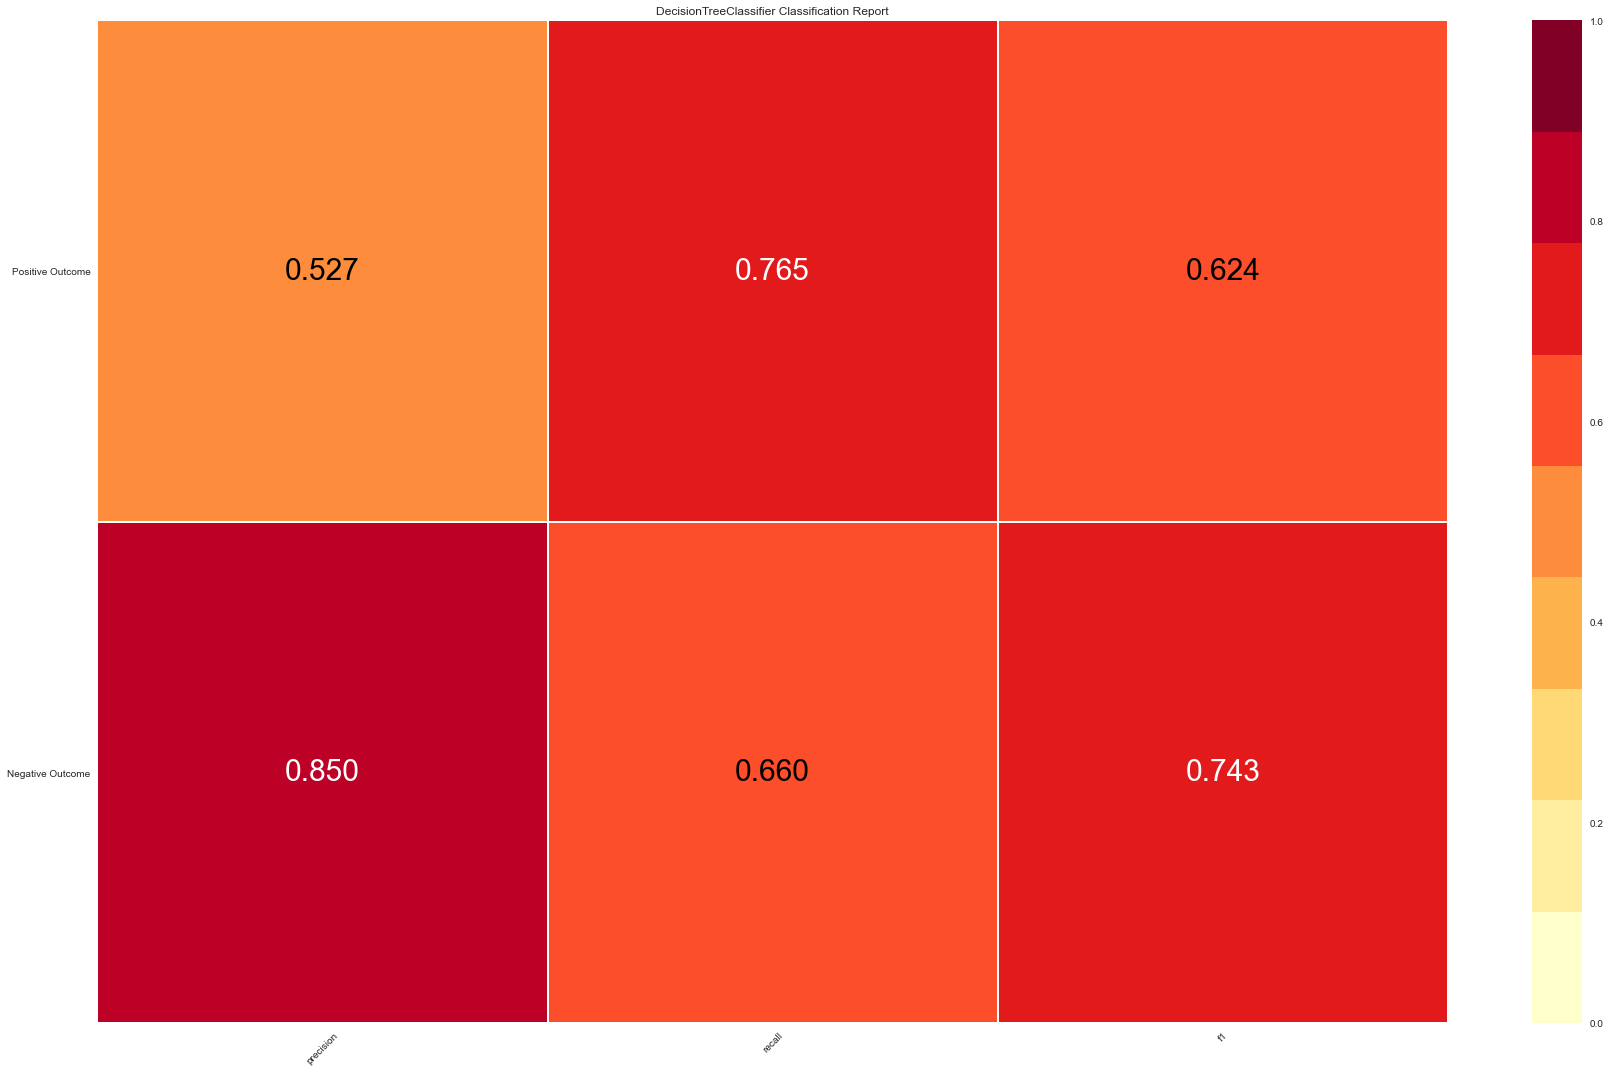

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [295]:
plt.figure(figsize=(25,15))
# Classification Report
dt_cr = ClassificationReport(dt, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
dt_cr.fit(X_train, y_test)
dt_cr.score(X_test, y_test)

# Confusion matrix vizualization
for l in dt_cr.ax.texts:
    l.set_size(30)
dt_cr.show()

Accuracy results are the lowest `69.48%` accuracy. F1 scores are:

* `0.624` for Positive outcome
* `0.743` of Negative outcome

In [296]:
# Adding results to compare
og_score.append({
    'Model' : 'Decision_Tree_OG',
    'Accuracy' : dt_accuracy,
    'F1_Positive' : 0.624,
    'F1_Negative' : 0.743,
    'AUC' : 0.75
})

By using the original data, random forest model seems to be the choice to predict diabetes. Next steps would be to apply the models on the highly correlated data and check the results and the variances between the original data and the highly correlated data.

### Modeling (High Correlated Data)

In [297]:
pd.set_option("display.max_rows", 10, "display.max_columns", 10)
# Data overview for high correlated
df_c = df.drop(columns=['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction'])
df_c

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6.0,148.0,35.0,33.6,50.0,1
1,1.0,85.0,29.0,26.6,31.0,0
2,8.0,183.0,29.0,23.3,32.0,1
3,1.0,89.0,23.0,28.1,21.0,0
4,0.0,137.0,35.0,43.1,33.0,1
...,...,...,...,...,...,...
763,10.0,101.0,42.5,32.9,63.0,0
764,2.0,122.0,27.0,36.8,27.0,0
765,5.0,121.0,23.0,26.2,30.0,0
766,1.0,126.0,29.0,30.1,47.0,1


In [298]:
# Splitting Outcome (target variable) out of the dataframe
X1 = df_c.drop(columns=['Outcome'])
y1 = df_c['Outcome']

print(X1)
print(y1)

     Pregnancies  Glucose  SkinThickness   BMI   Age
0            6.0    148.0           35.0  33.6  50.0
1            1.0     85.0           29.0  26.6  31.0
2            8.0    183.0           29.0  23.3  32.0
3            1.0     89.0           23.0  28.1  21.0
4            0.0    137.0           35.0  43.1  33.0
..           ...      ...            ...   ...   ...
763         10.0    101.0           42.5  32.9  63.0
764          2.0    122.0           27.0  36.8  27.0
765          5.0    121.0           23.0  26.2  30.0
766          1.0    126.0           29.0  30.1  47.0
767          1.0     93.0           31.0  30.4  23.0

[768 rows x 5 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [299]:
#Splitting the high correlated data into training data and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=60)

print(f'\n----- Shape of the splits -----')
print(f'X_train: {X1_train.shape[0]} rows and {X1_train.shape[1]} columns')
print(f'X_test: {X1_test.shape[0]} rows and {X1_test.shape[1]} columns\n')


----- Shape of the splits -----
X_train: 614 rows and 5 columns
X_test: 154 rows and 5 columns



#### Linear Regression (High Correlated)

In [300]:
# Fitting and predicting using Logistic Regression
lr1 = LogisticRegression(max_iter=500)
lr1.fit(X1_train, y1_train)
lr1_test = lr1.predict(X1_test)


Accuracy: 75.97%



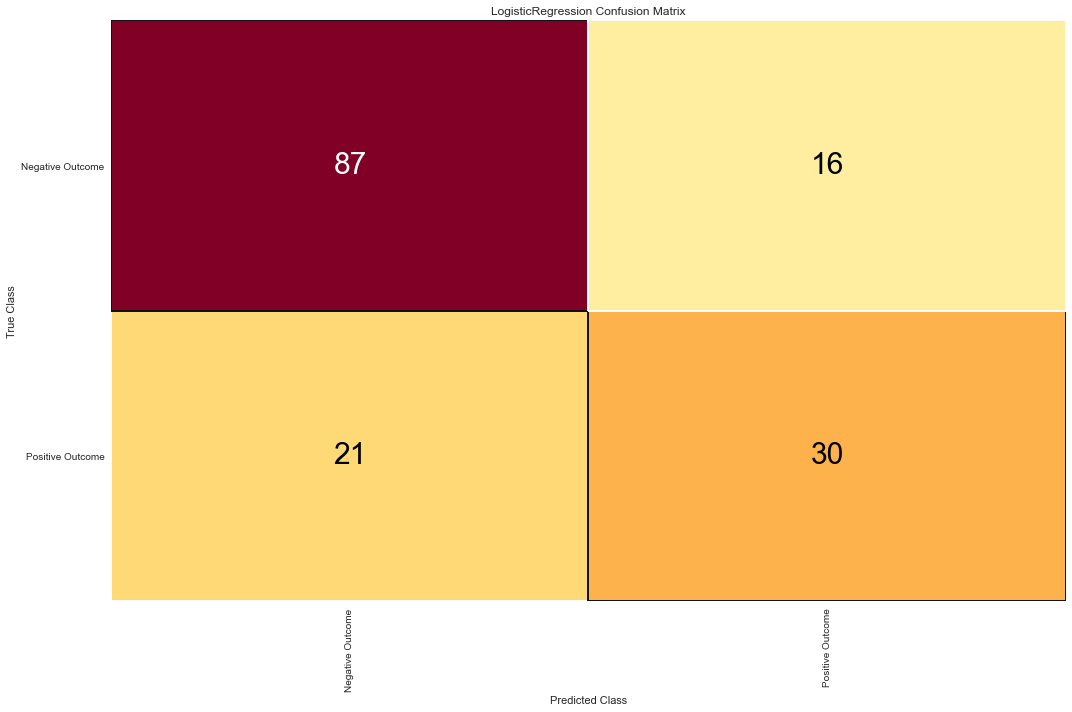

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [301]:
plt.figure(figsize=(15,10))

# Computing results of Linear Regression
cm_lr1 = ConfusionMatrix(lr1, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
cm_lr1.fit(X1_test, y1_test)

# Computing accuracy of the model
lr1_accuracy = round(cm_lr1.score(X1_test, y1_test) * 100, 2)
print(f'\nAccuracy: {lr1_accuracy}%\n')

# Confusion matrix vizualization
for l in cm_lr1.ax.texts:
    l.set_size(30)
cm_lr1.show()

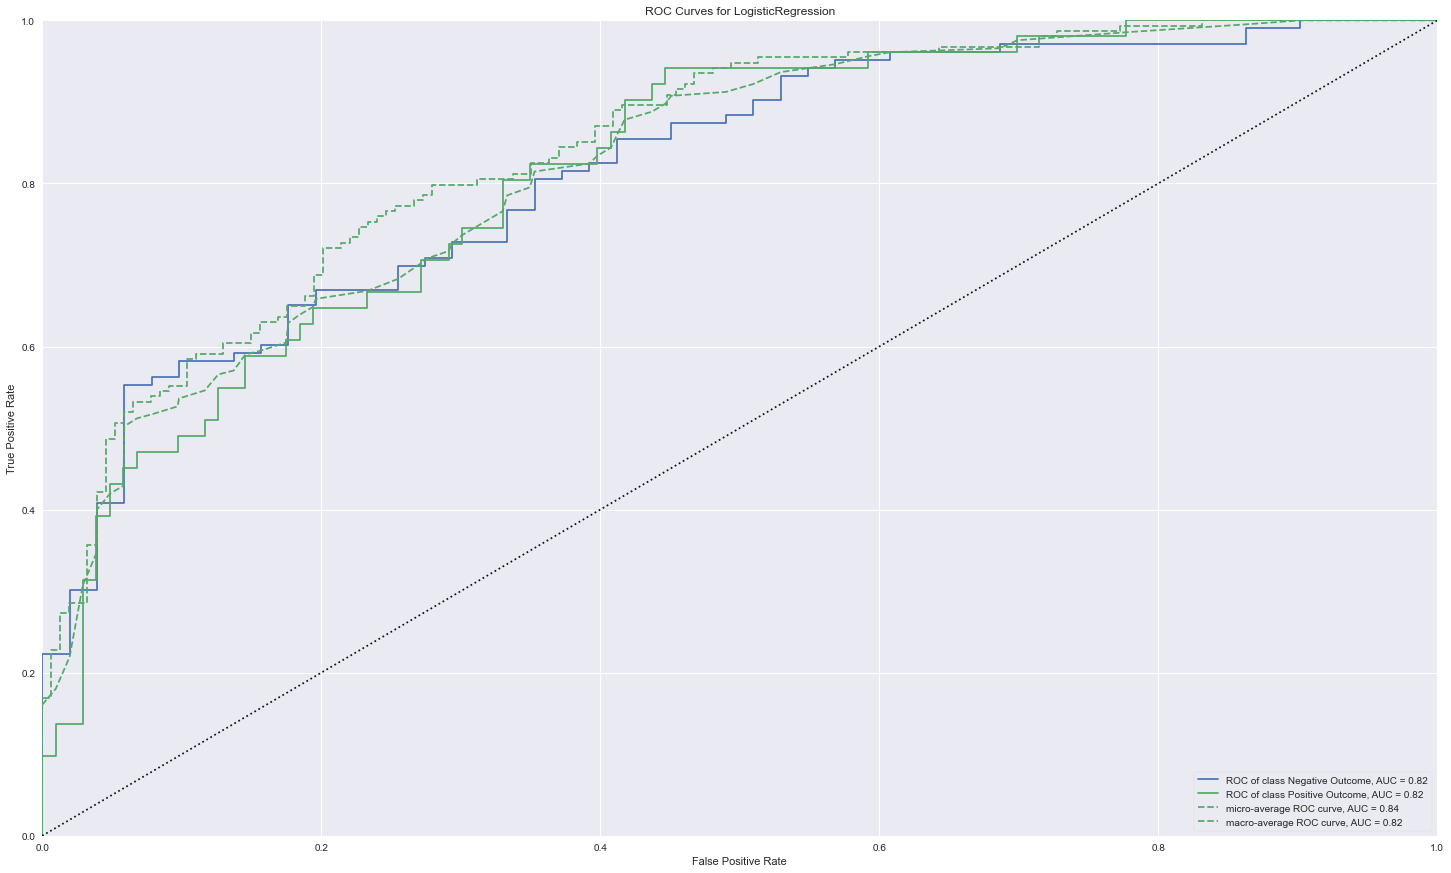

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [302]:
plt.figure(figsize=(25,15))
# ROC curve and AUC score
lr1_roc = ROCAUC(lr1, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
lr1_roc.fit(X1_test, y1_test)

lr1_roc.score(X1_test, y1_test)
lr1_roc.show()

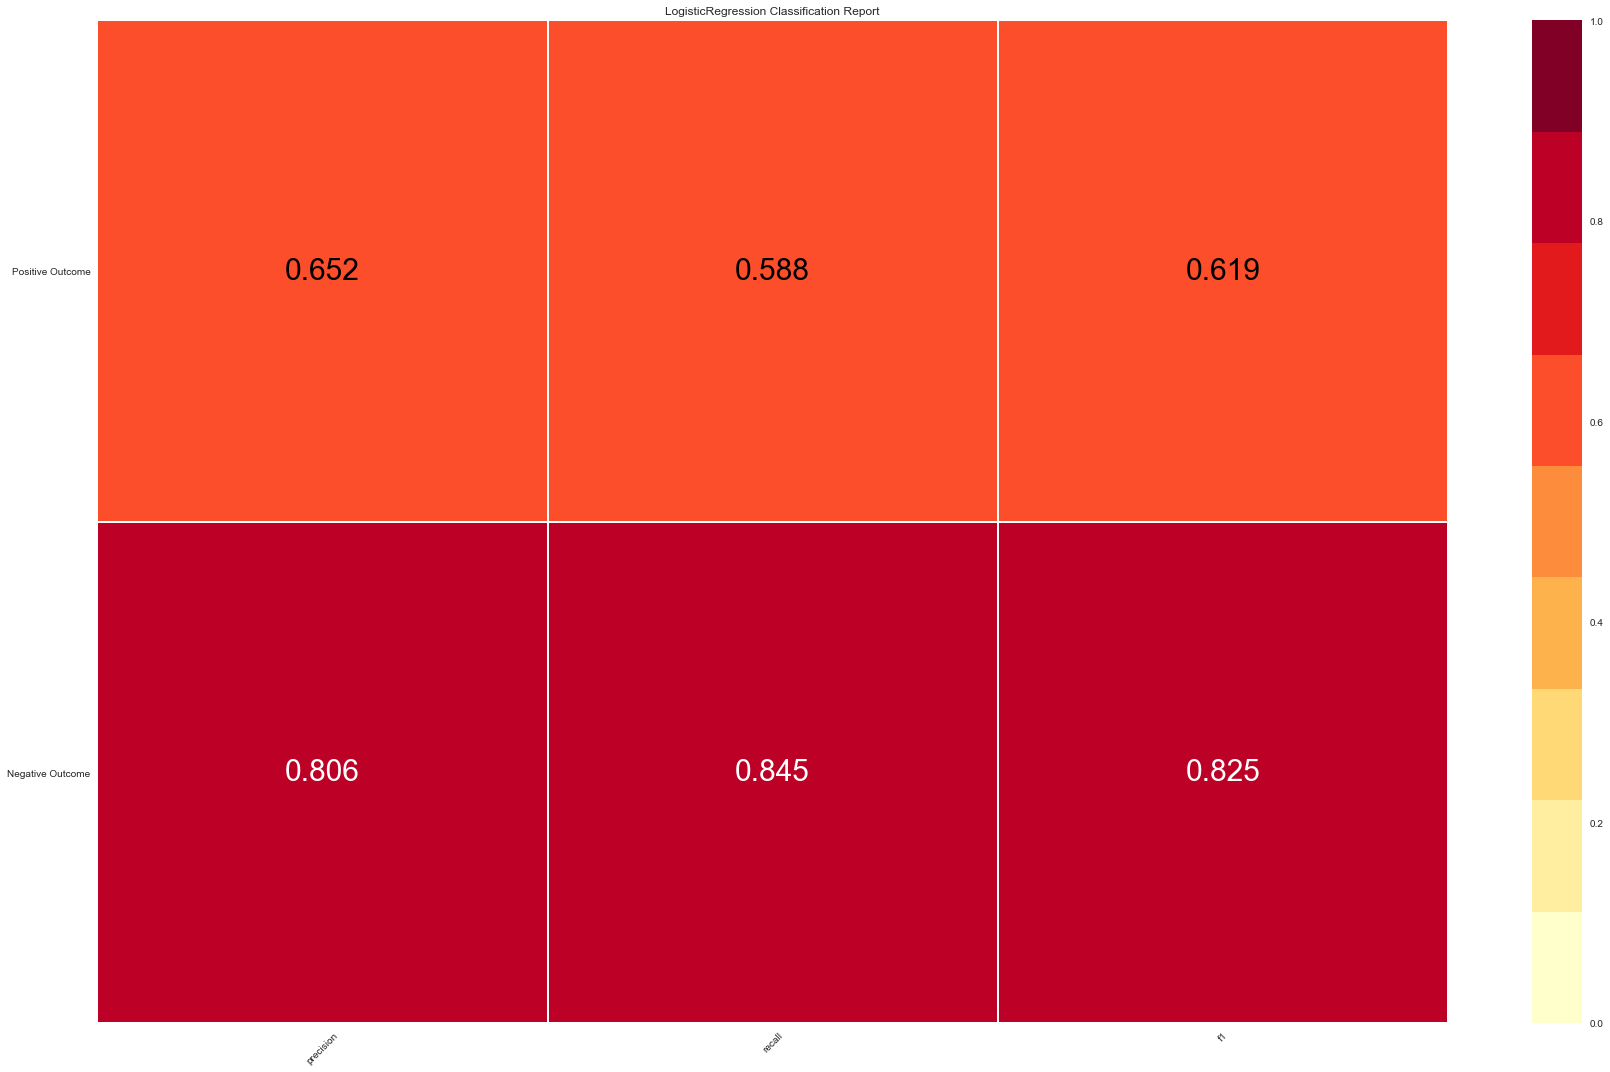

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [303]:
plt.figure(figsize=(25,15))
# Classification Report
lr1_cr = ClassificationReport(lr1, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
lr1_cr.fit(X1_train, y1_test)
lr1_cr.score(X1_test, y1_test)

# Confusion matrix vizualization
for l in lr1_cr.ax.texts:
    l.set_size(30)
lr1_cr.show()

The model shows an accuracy of `75.97%` for logistic regression for high correlated variables only. F1 scores are:

* `0.619` for Positive outcome
* `0.825` of Negative outcome

In [304]:
# Adding model results
og_score.append({
    'Model' : 'Logistic_Regression_HC',
    'Accuracy' : lr1_accuracy,
    'F1_Positive' : 0.619,
    'F1_Negative' : 0.825,
    'AUC' : 0.82
})

#### Random Forest (High Correlated Data)

In [305]:
# Fitting and predicting using Random Forest
rf1 = RandomForestClassifier(n_estimators=500, random_state=60)
rf1.fit(X1_train, y1_train)
rf1_test = rf1.predict(X1_test)


Accuracy: 75.32%



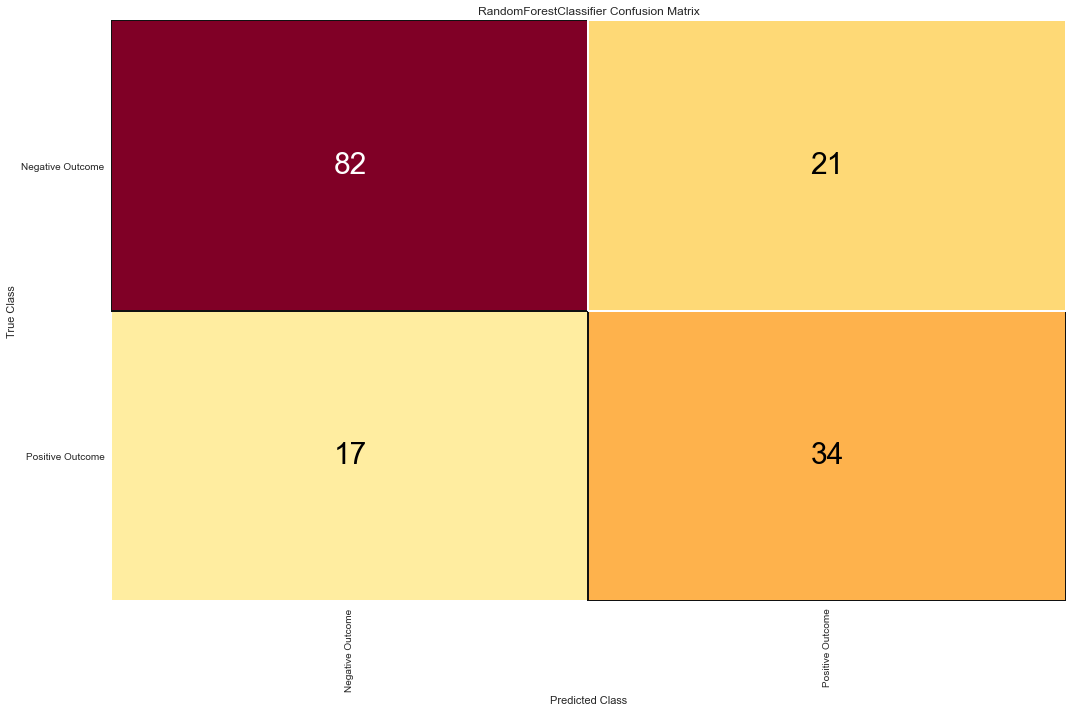

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [306]:
plt.figure(figsize=(15,10))

# Computing results of Random Forest
cm_rf1 = ConfusionMatrix(rf1, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
cm_rf1.fit(X1_test, y1_test)

# Computing accuracy of the model
rf1_accuracy = round(cm_rf1.score(X1_test, y1_test) * 100, 2)
print(f'\nAccuracy: {rf1_accuracy}%\n')

# Confusion matrix vizualization
for l in cm_rf1.ax.texts:
    l.set_size(30)
cm_rf1.show()

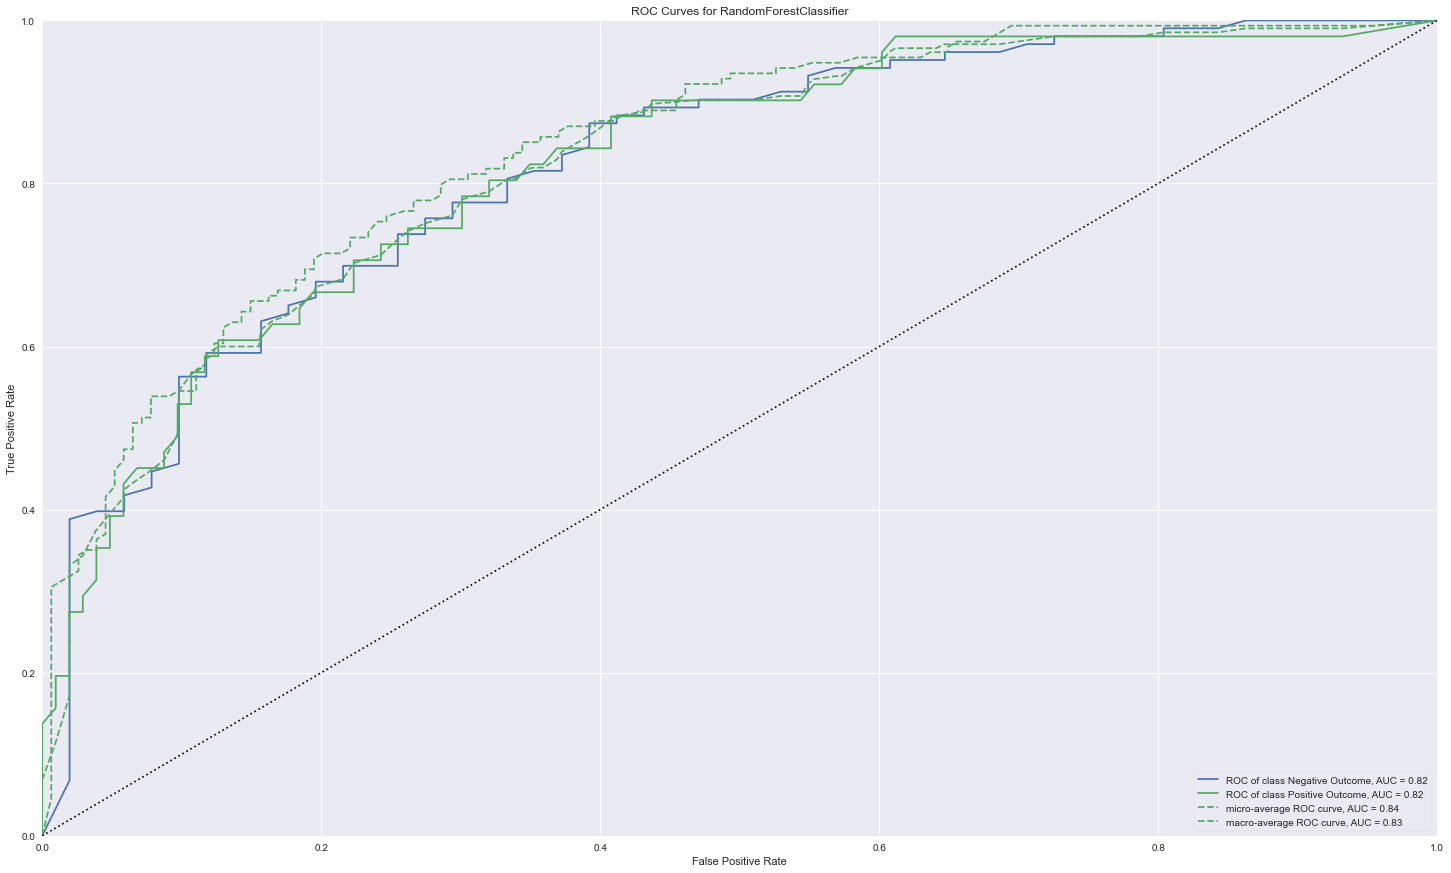

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [307]:
plt.figure(figsize=(25,15))
# ROC curve and AUC score
rf1_roc = ROCAUC(rf1, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
rf1_roc.fit(X1_test, y1_test)

rf1_roc.score(X1_test, y1_test)
rf1_roc.show()

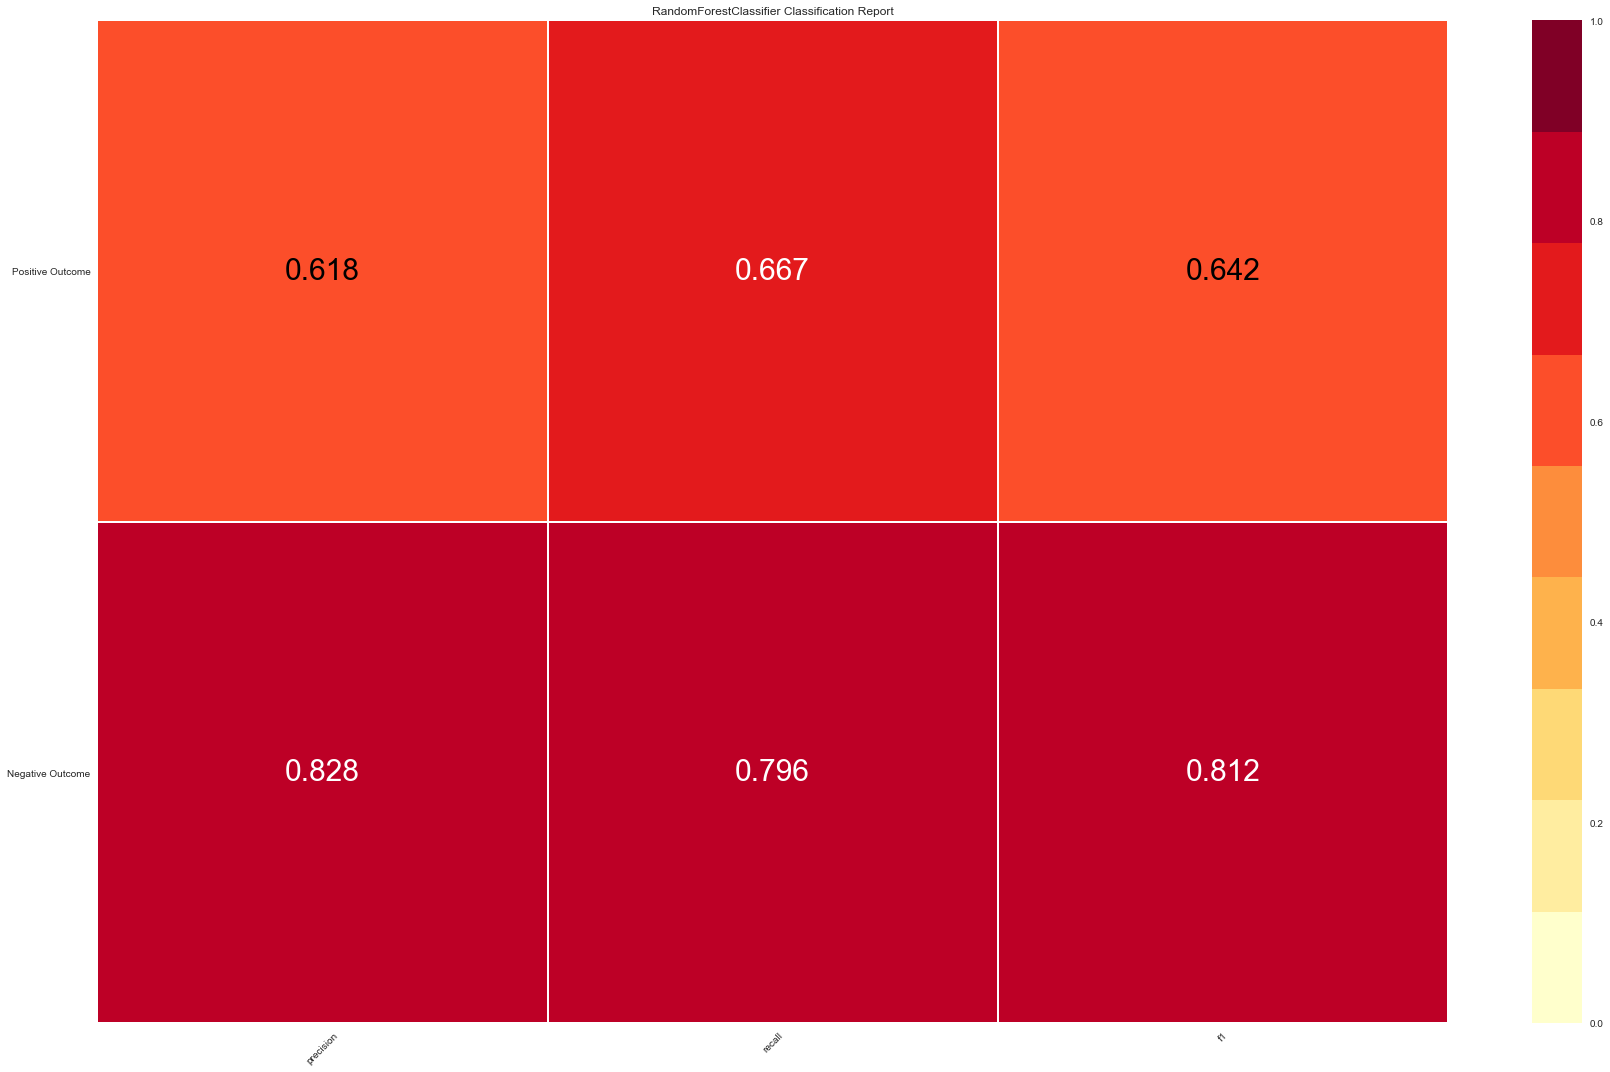

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [309]:
plt.figure(figsize=(25,15))
# Classification Report
rf1_cr = ClassificationReport(rf1, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
rf1_cr.fit(X1_train, y1_test)
rf1_cr.score(X1_test, y1_test)

# Confusion matrix vizualization
for l in rf1_cr.ax.texts:
    l.set_size(30)
rf1_cr.show()

Random Forest resulted with `75.32%` accuracy. F1 scores are:

* `0.642` for Positive outcome
* `0.812` of Negative outcome

In [310]:
# Adding results to compare
og_score.append({
    'Model' : 'Random_Forest_HC',
    'Accuracy' : rf1_accuracy,
    'F1_Positive' : 0.642,
    'F1_Negative' : 0.812,
    'AUC' : 0.82
})

#### Decision Tree (High Correlated Data)

In [312]:
# Fitting and predicting using Decision Tree
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X1_train, y1_train)
dt1_test = dt1.predict(X1_test)


Accuracy: 68.83%



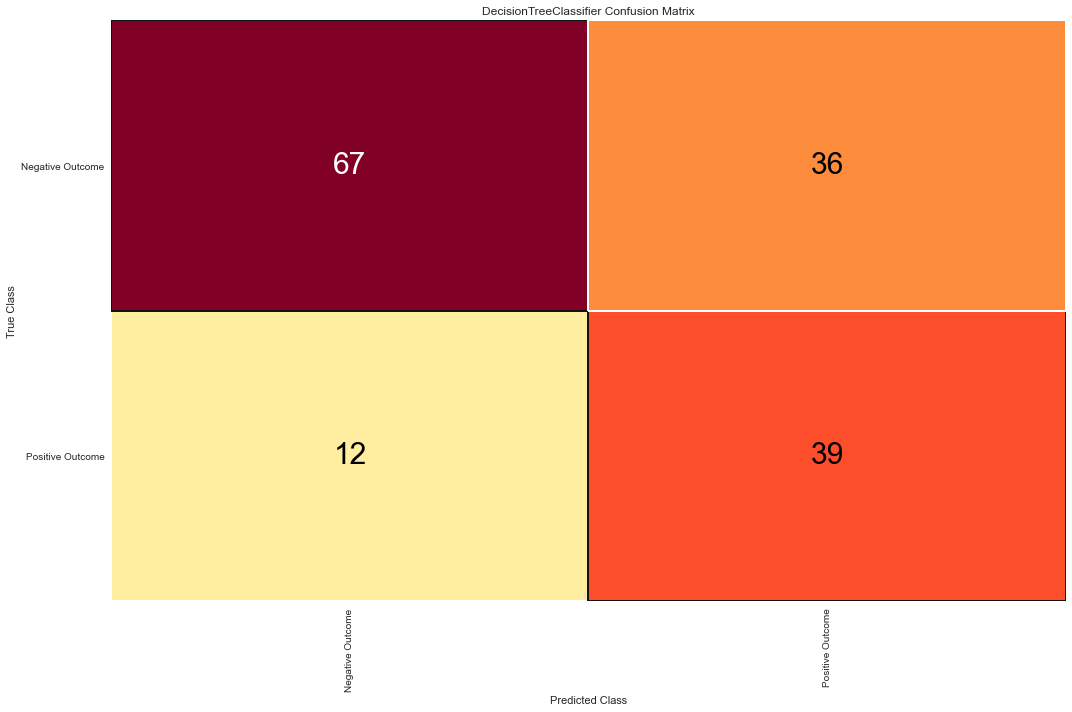

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [314]:
plt.figure(figsize=(15,10))

# Computing results of Random Forest
cm_dt1 = ConfusionMatrix(dt1, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
cm_dt1.fit(X1_test, y1_test)

# Computing accuracy of the model
dt1_accuracy = round(cm_dt1.score(X1_test, y1_test) * 100, 2)
print(f'\nAccuracy: {dt1_accuracy}%\n')

# Confusion matrix vizualization
for l in cm_dt1.ax.texts:
    l.set_size(30)
cm_dt1.show()

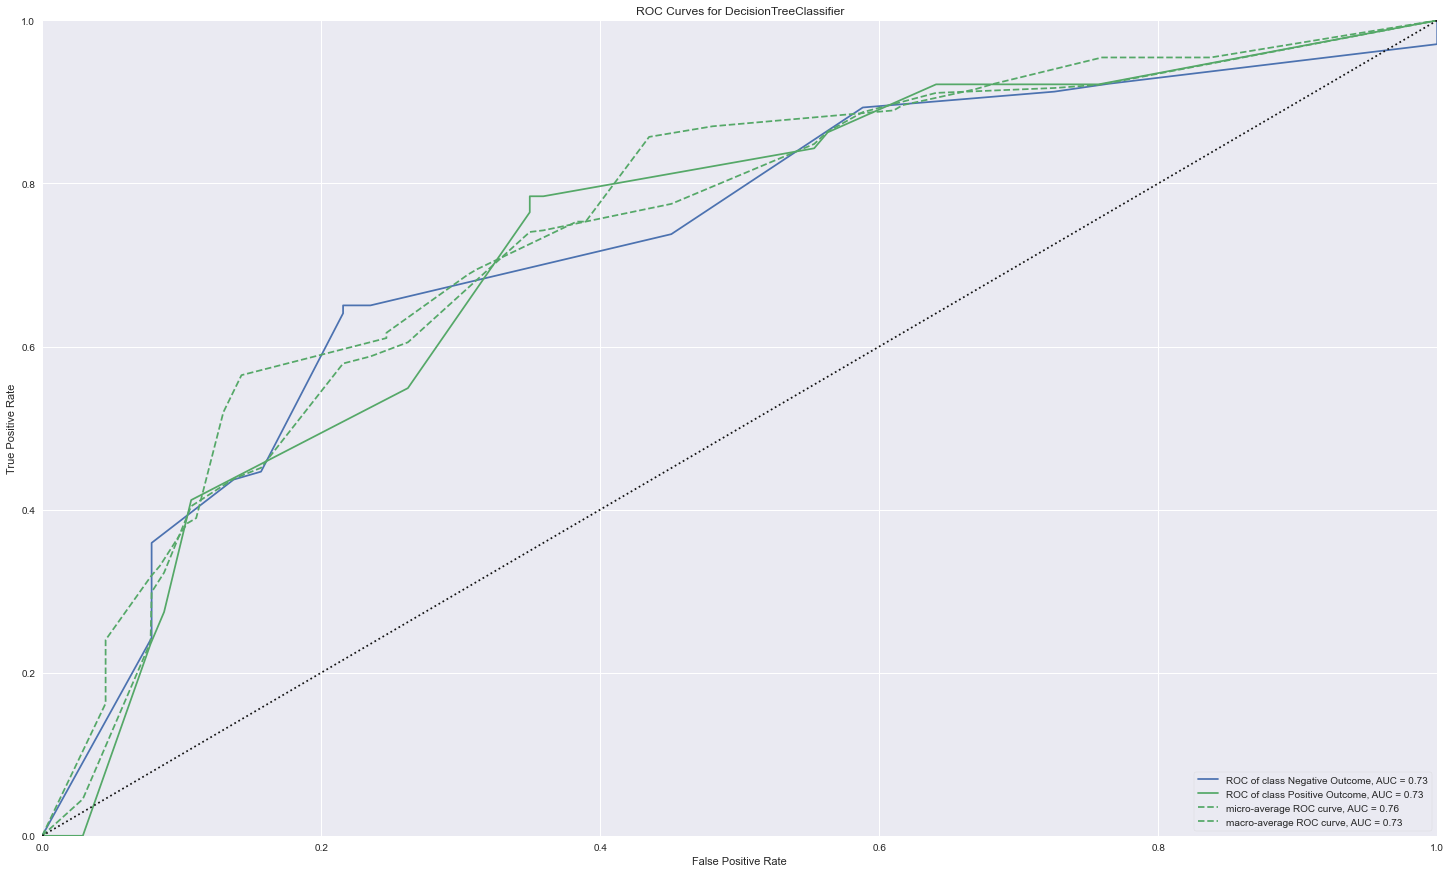

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [316]:
plt.figure(figsize=(25,15))
# ROC curve and AUC score
dt1_roc = ROCAUC(dt1, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
dt1_roc.fit(X1_test, y1_test)

dt1_roc.score(X1_test, y1_test)
dt1_roc.show()

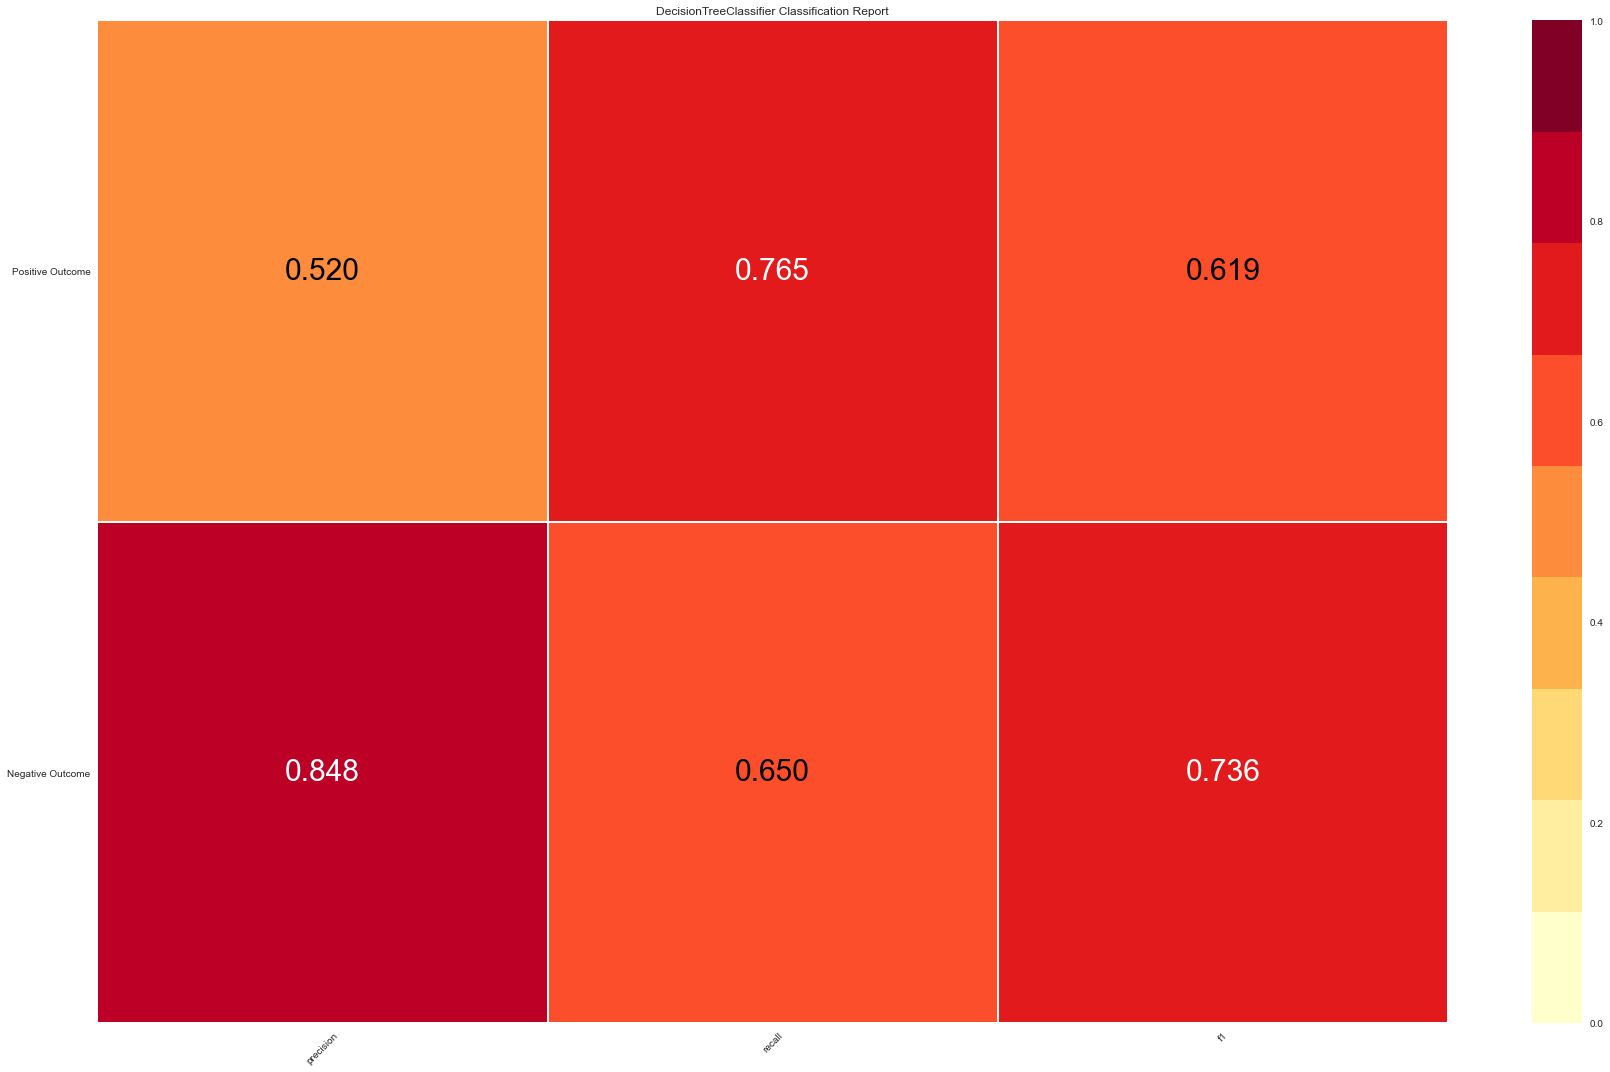

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [318]:
plt.figure(figsize=(25,15))
# Classification Report
dt1_cr = ClassificationReport(dt1, encoder={0 : 'Negative Outcome', 1: 'Positive Outcome'})
dt1_cr.fit(X1_train, y1_test)
dt1_cr.score(X1_test, y1_test)

# Confusion matrix vizualization
for l in dt1_cr.ax.texts:
    l.set_size(30)
dt1_cr.show()

Accuracy results are `68.83%` accuracy. F1 scores are:

* `0.619` for Positive outcome
* `0.736` of Negative outcome

In [319]:
# Adding results to compare
og_score.append({
    'Model' : 'Decision_Tree_HC',
    'Accuracy' : dt1_accuracy,
    'F1_Positive' : 0.619,
    'F1_Negative' : 0.736,
    'AUC' : 0.73
})

### Model Evaluation

In [320]:
# Showing results by creating table
df_results = pd.DataFrame(og_score, columns=['Model', 'Accuracy', 'F1_Positive', 'F1_Negative', 'AUC'])
df_results.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy,F1_Positive,F1_Negative,AUC
1,Random_Forest_OG,78.57,0.697,0.834,0.84
0,Logistic_Regression_OG,76.62,0.640,0.827,0.84
3,Logistic_Regression_HC,75.97,0.619,0.825,0.82
4,Random_Forest_HC,75.32,0.642,0.812,0.82
2,Decision_Tree_OG,69.48,0.624,0.743,0.75
5,Decision_Tree_HC,68.83,0.619,0.736,0.73


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

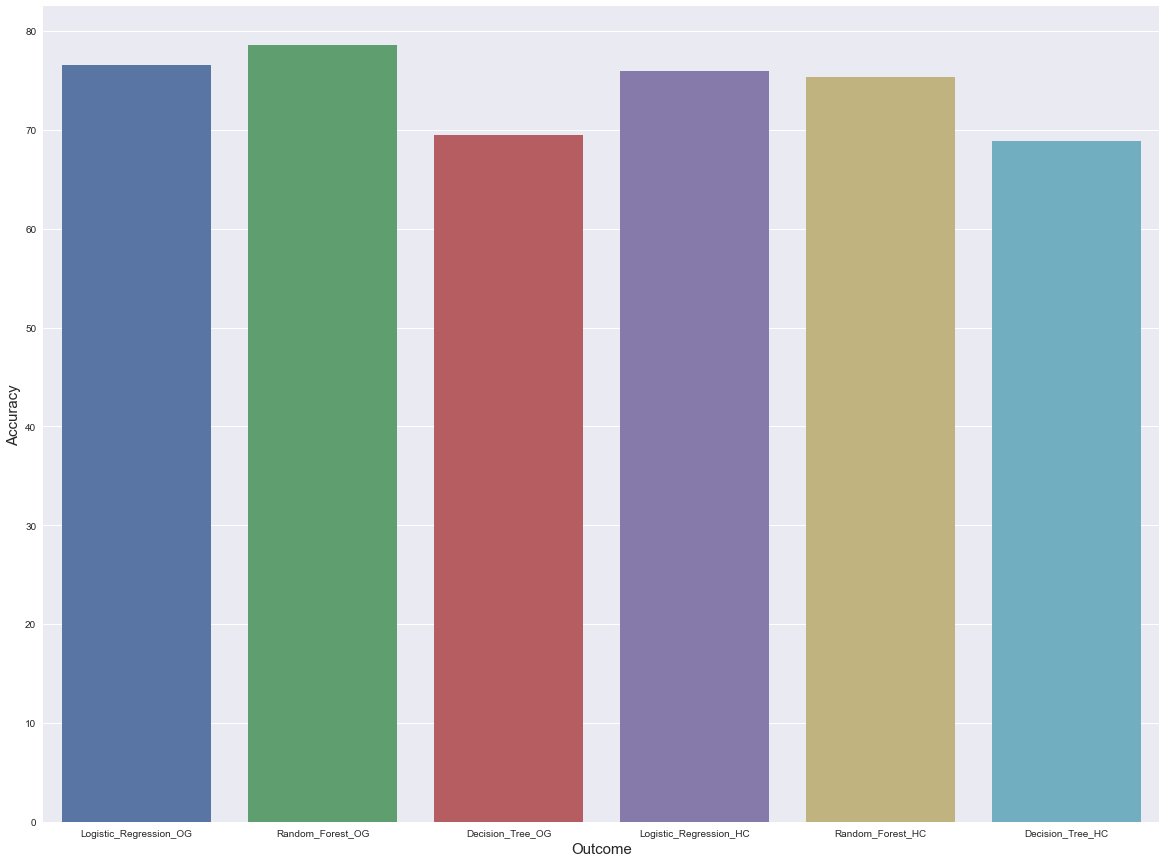

In [323]:
plt.figure(figsize=(20,15))
# Applying barchart to show accuracy results
sns.barplot(data=df_results, x='Model', y='Accuracy')
plt.xlabel('Outcome', fontsize=15)
plt.xticks(fontsize=10)
plt.ylabel('Accuracy', fontsize=15)
plt.yticks(fontsize=10)

Based on the results the model of choice would be applying random forest classifer to all the variables. Highly correlated data on its own results in a minor decline of the accuracy meaning the other variables do contribute in predicting the outcome.